In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import urllib.request, json 
import matplotlib.ticker as mtick
from matplotlib.patches import Rectangle
from matplotlib.dates import DateFormatter
import datetime 
from matplotlib import rc,rcParams
import dateutil.relativedelta

In [2]:
date = pd.to_datetime("today").strftime('_%m_%d')
print('Latest update time is:',date)

Latest update time is: _10_07


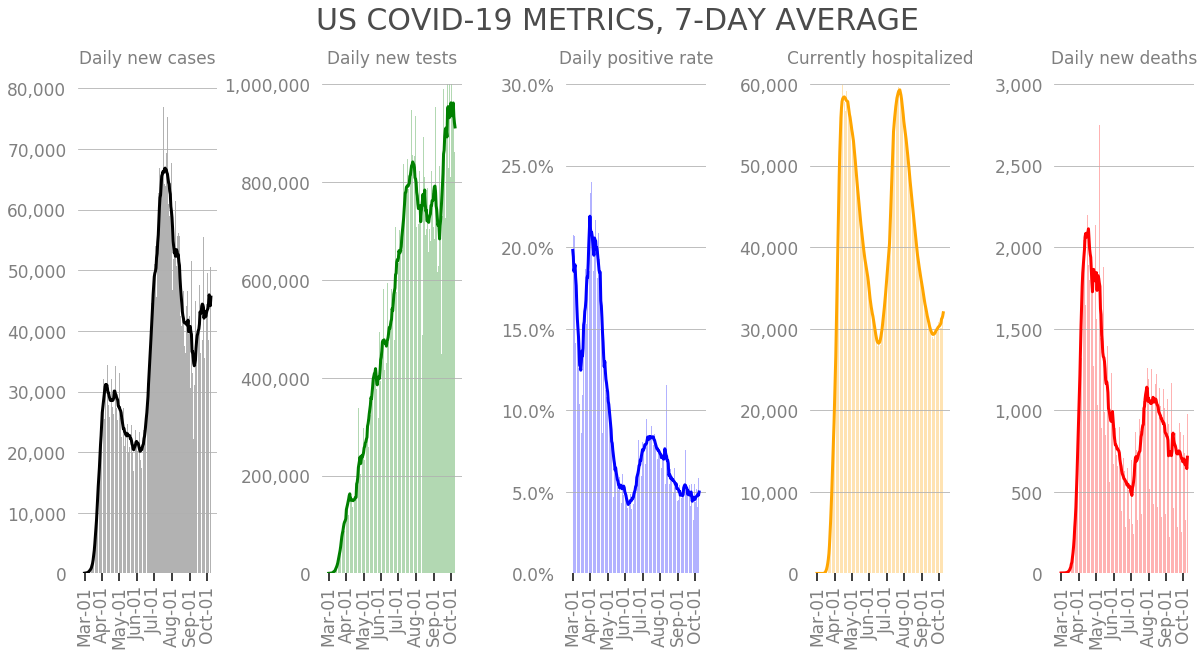

In [14]:
with urllib.request.urlopen("https://covidtracking.com/api/v1/states/daily.json") as url:
    data = json.loads(url.read().decode())
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df.date, format='%Y%m%d')

df[df['date']==df['date'][0]]
focus = df.groupby('date').agg(sum).copy()

offset = 39
focus = focus.iloc[offset:]


fig, axis= plt.subplots(1, 5,figsize=(20,9) , squeeze=False)
axis = axis.flatten()

window = 7

focus['average'] = focus['positiveIncrease'].rolling(window=window, min_periods=1, center=True).mean()

focus['average_new_tests'] = focus['totalTestResultsIncrease'].rolling(window=window, min_periods=1, center=True).mean()

focus['average_hospitalization'] = focus['hospitalizedCurrently'].rolling(window=window, min_periods=1, center=True).mean()

focus['average_positivity'] = (focus['positiveIncrease']/focus['totalTestResultsIncrease']*100).rolling(window=window, min_periods=1, center=True).mean()

focus['average_death_increase'] = focus['deathIncrease'].rolling(window=window, min_periods=1, center=True).mean()

focus.fillna(0, inplace=True)


# SETTING FONT #
rc('font',weight='light')
rc('axes', lw=0.01)

# LINE PLOT #
axis[0].plot(focus['average'], color = 'black', lw=3)
axis[1].plot(focus['average_new_tests'],color='green', lw=3 )
axis[2].plot(focus['average_positivity'],color ='blue', lw=3)
axis[3].plot(focus['average_hospitalization'],color = 'orange',lw=3)
axis[4].plot(focus['average_death_increase'],color = 'red',lw=3)

# BAR PLOT #
axis[0].bar(x=focus.index, height=focus['positiveIncrease'], color ='black', alpha=0.3)
axis[1].bar(x=focus.index, height=focus['totalTestResultsIncrease'], color = 'green',alpha=0.3)
axis[2].bar(x=focus.index, height=focus['positiveIncrease']/focus['totalTestResultsIncrease']*100, color ='blue',alpha=0.3)
axis[3].bar(x=focus.index, height=focus['hospitalizedCurrently'], color ='orange',alpha=0.3)
axis[4].bar(x=focus.index, height=focus['deathIncrease'], color ='red',alpha=0.3)

# SETTING FIGURE MAIN TITLE #
fig.suptitle('{} COVID-19 METRICS, 7-DAY AVERAGE'.format('US'), fontsize=30, y =1, alpha=0.7)

# SETTING SUBPLOTS TITLE #
axis[0].set_title('Daily new cases',fontsize=17, y=1.03, alpha=0.5)
axis[1].set_title('Daily new tests',fontsize=17, y=1.03, alpha=0.5)
axis[2].set_title('Daily positive rate',fontsize=17, y=1.03, alpha=0.5)
axis[3].set_title('Currently hospitalized',fontsize=17, y=1.03, alpha=0.5)
axis[4].set_title('Daily new deaths',fontsize=17, y=1.03, alpha=0.5)

# DATE FORMATTER #
date_form = DateFormatter("%b-%d")

# SETTING LABEL TO TOP & FORMATTING DATE #
for ax in axis:
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_major_formatter(date_form)    

# SETTING TICK PARAMATERS #
for ax in axis:
    ax.tick_params(axis='y',labelcolor= 'grey',labelsize = 17,width=0, length=8)
    ax.tick_params(axis='x',labelcolor= 'grey',labelsize = 17,labelrotation=90, width=1.5, length=8)

# SETTING TICK LIMITS #
axis[0].set_ylim(bottom=0)
axis[1].set_ylim(bottom=0, top=1000000)
axis[2].set_ylim(bottom=0, top=30)
axis[3].set_ylim(bottom=0, top=60000)
axis[4].set_ylim(bottom=0, top=3000)

# FOR PUTTING COMMAS IN NUMBERS #
for ax in axis:
    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])              

# SETTING Y AXIS IN % FOR PLOT 3#
axis[2].yaxis.set_major_formatter(mtick.PercentFormatter())

# SETTING GRID #
for ax in axis:
    ax.grid(axis='y')

# SETTING WIDTH BETWEEN THE PLOTS #
plt.subplots_adjust(wspace=0.75)

#trying to remove frames/spines
for ax in axis:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


plt.savefig(r'figures\/%s.png'% ('US'), dpi=300, bbox_inches='tight', pad_inches=1)

plt.show()

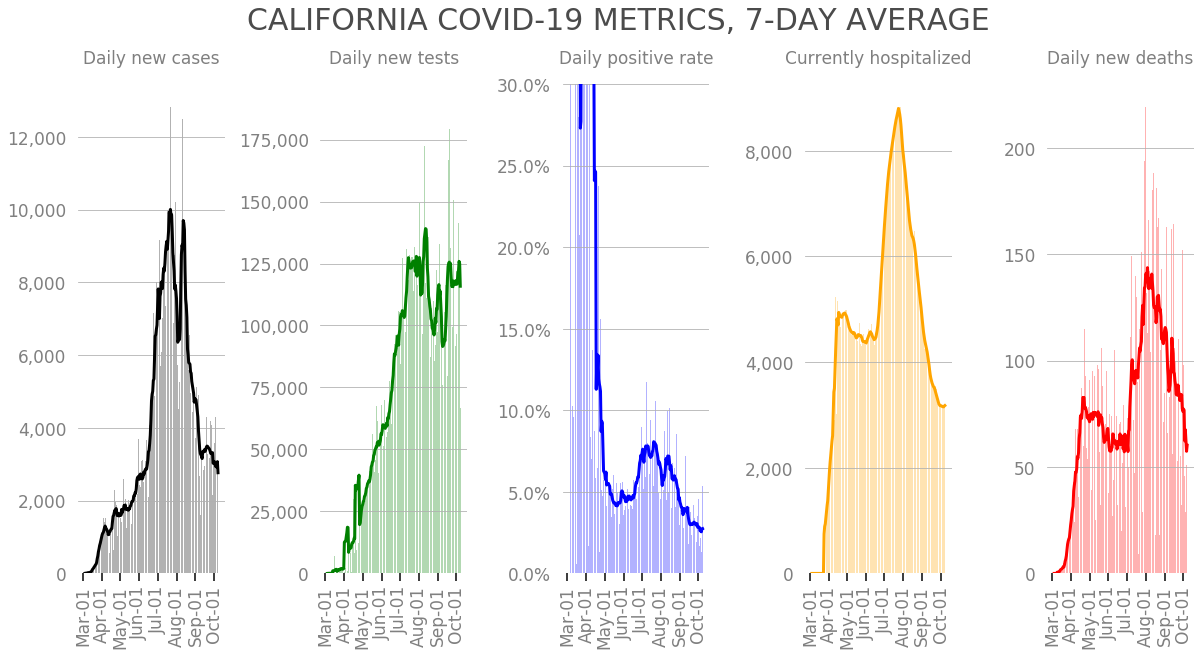

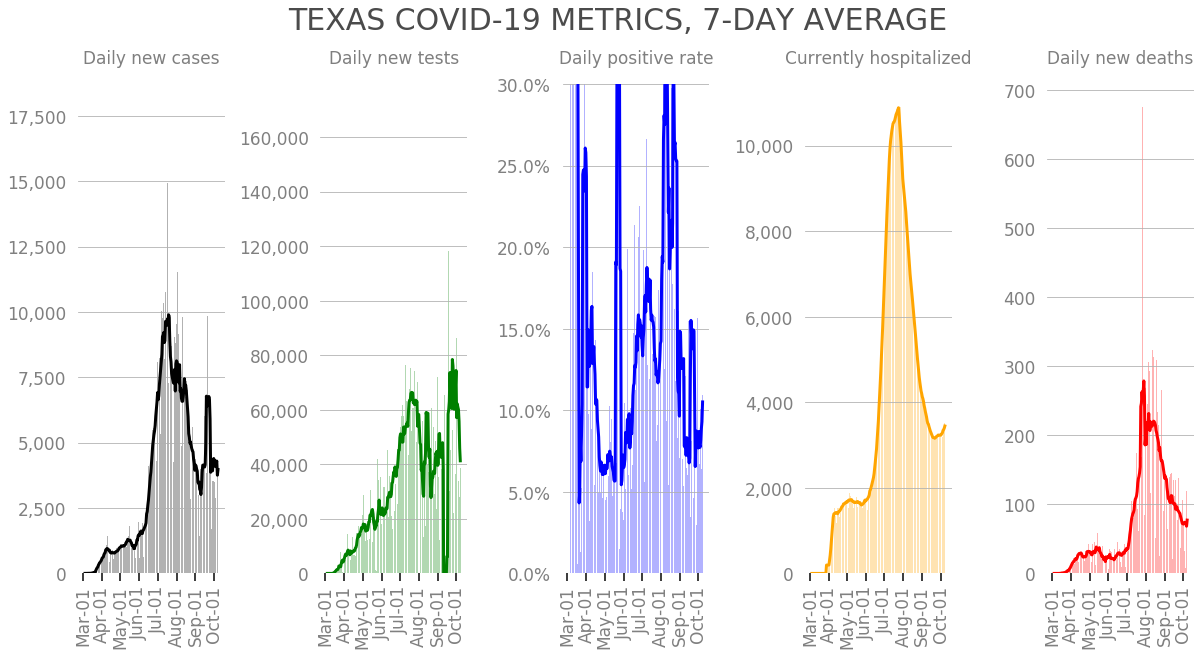

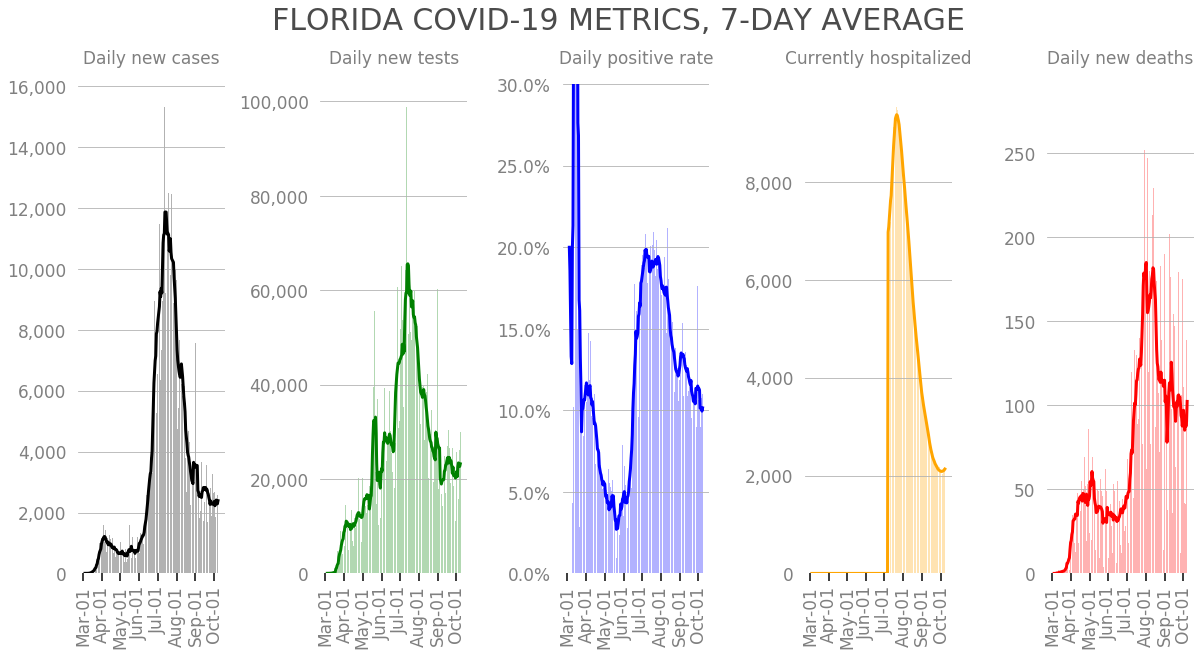

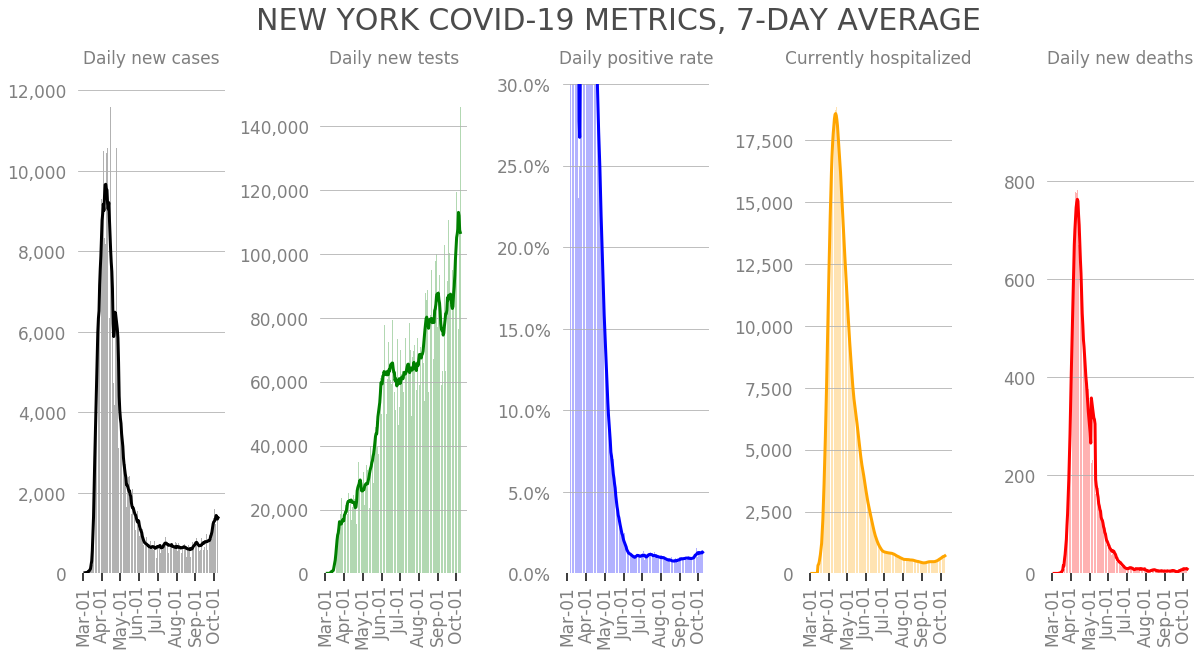

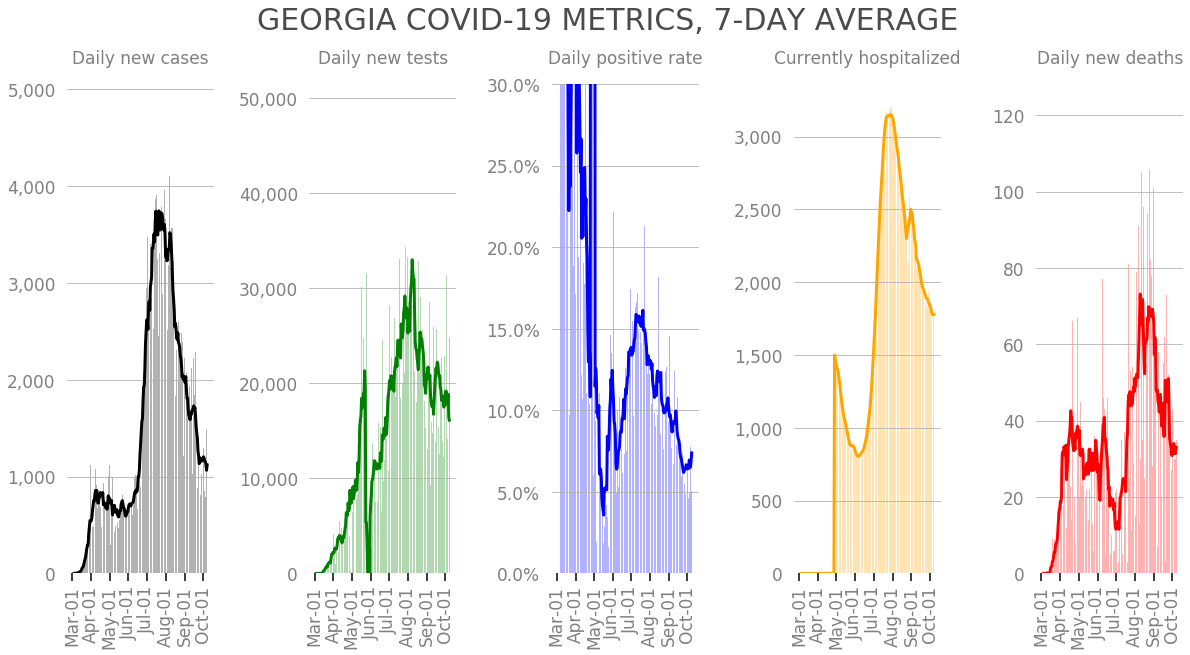

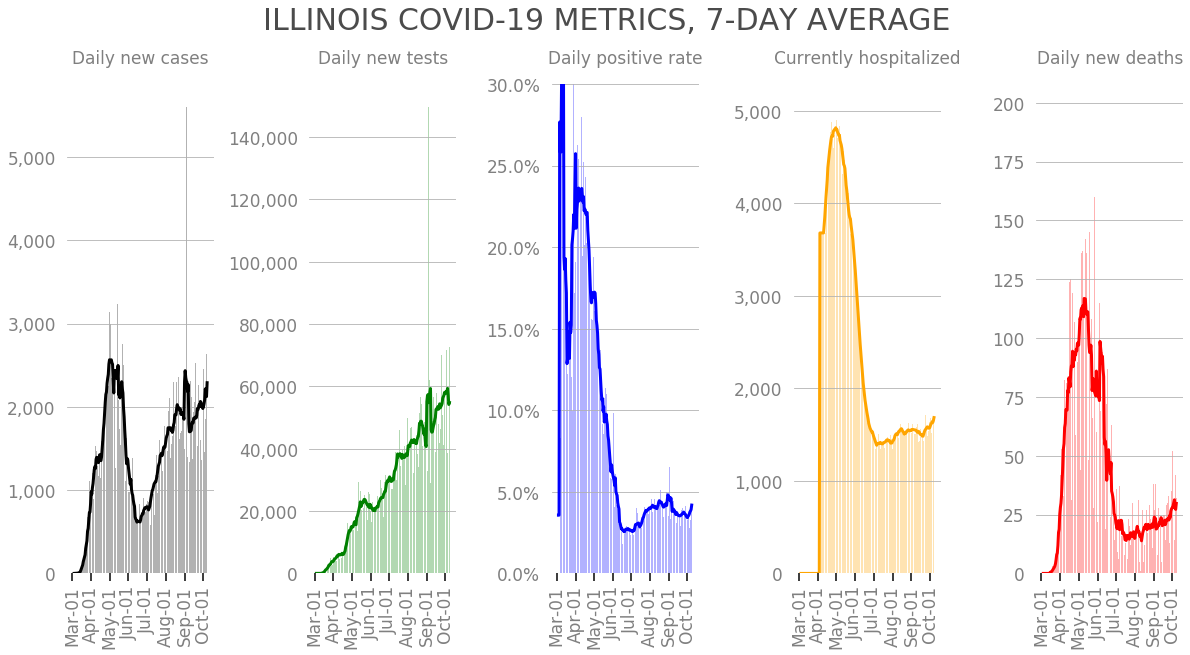

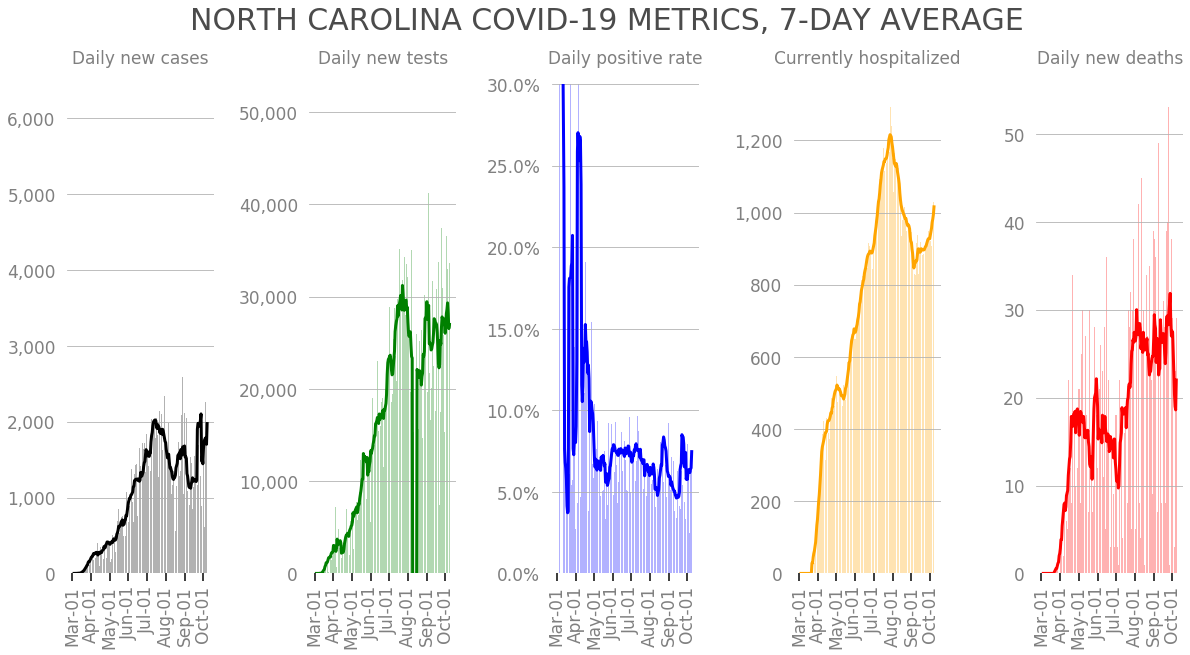

KeyboardInterrupt: 

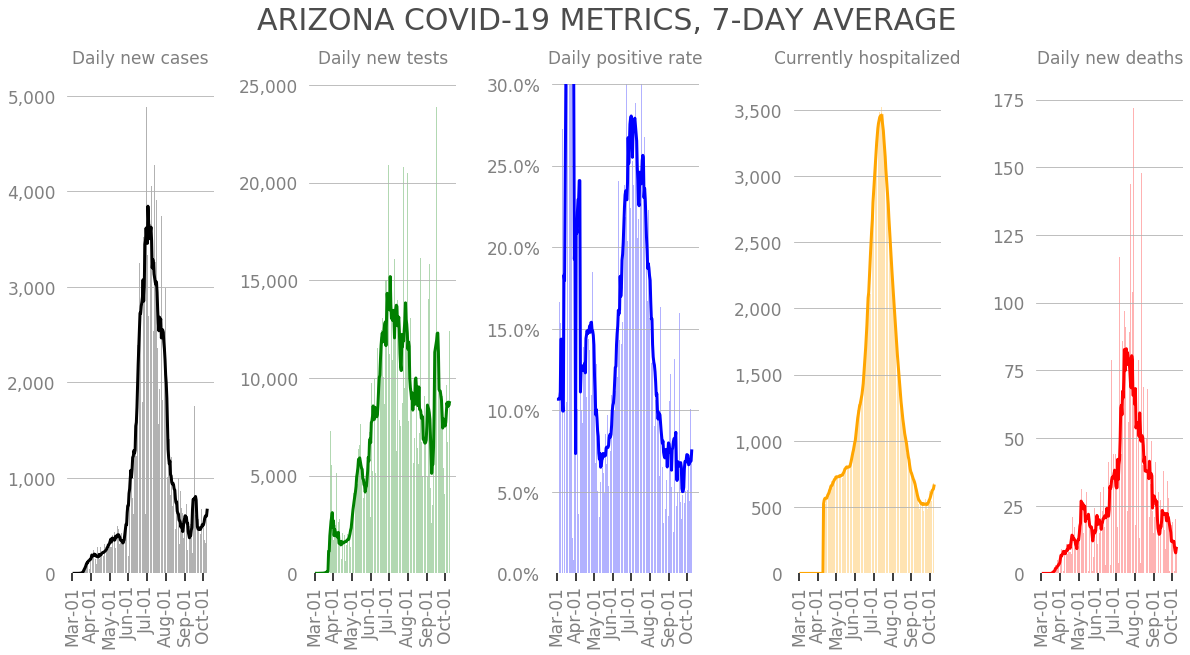

In [16]:
for focus_state in df[df['date']==df['date'][0]].sort_values('positive', ascending=False)['state']:
    
    #if you only want one state, use this. Otherwise, comment out. 
    """
    if focus_state == 'AZ':
        pass
    else:
         continue
    """
    
    if focus_state not in ['AS', 'GU', 'MP', 'NA' 'PR', 'VI']:
        pass
    else:
        continue
    
    states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
             }
    state_full_name = str(states[focus_state])
    
    focus = df[df['state']==focus_state].drop('state', axis=1)
    focus.index = pd.date_range(end=df['date'][0],periods=len(focus), freq='D')[::-1]

    #offset = 45
    #focus =  focus.iloc[:-offset]
    
    fig, axis= plt.subplots(1, 5,figsize=(20,9) , squeeze=False)
    axis = axis.flatten()
    
    
    window = 7

    focus['average'] = focus['positiveIncrease'].rolling(window=window, min_periods=1, center=True).mean()

    focus['average_new_tests'] = focus['totalTestResultsIncrease'].rolling(window=window, min_periods=1, center=True).mean()

    focus['average_hospitalization'] = focus['hospitalizedCurrently'].rolling(window=window, min_periods=1, center=True).mean()

    focus['average_positivity'] = (focus['positiveIncrease']/focus['totalTestResultsIncrease']*100).rolling(window=window, min_periods=1, center=True).mean()

    focus['average_death_increase'] = focus['deathIncrease'].rolling(window=window, min_periods=1, center=True).mean()

    focus.fillna(0, inplace=True)

    # SETTING FONT #
    rc('font',weight='light')
    rc('axes', lw=0.01)
    
    # LINE PLOT #
    axis[0].plot(focus['average'], color = 'black', lw=3)
    axis[1].plot(focus['average_new_tests'],color='green', lw=3 )
    axis[2].plot(focus['average_positivity'],color ='blue', lw=3)
    axis[3].plot(focus['average_hospitalization'],color = 'orange',lw=3)
    axis[4].plot(focus['average_death_increase'],color = 'red',lw=3)

    # BAR PLOT #
    axis[0].bar(x=focus.index, height=focus['positiveIncrease'], color ='black', alpha=0.3)
    axis[1].bar(x=focus.index, height=focus['totalTestResultsIncrease'], color = 'green',alpha=0.3)
    axis[2].bar(x=focus.index, height=focus['positiveIncrease']/focus['totalTestResultsIncrease']*100, color ='blue',alpha=0.3)
    axis[3].bar(x=focus.index, height=focus['hospitalizedCurrently'], color ='orange',alpha=0.3)
    axis[4].bar(x=focus.index, height=focus['deathIncrease'], color ='red',alpha=0.3)

    # SETTING FIGURE MAIN TITLE #
    fig.suptitle('{} COVID-19 METRICS, 7-DAY AVERAGE'.format(state_full_name.upper()), fontsize=30, y =1, alpha=0.7)
    
    
    # SETTING SUBPLOTS TITLE #
    axis[0].set_title('Daily new cases',fontsize=17, y=1.03, alpha=0.5)
    axis[1].set_title('Daily new tests',fontsize=17, y=1.03, alpha=0.5)
    axis[2].set_title('Daily positive rate',fontsize=17, y=1.03, alpha=0.5)
    axis[3].set_title('Currently hospitalized',fontsize=17, y=1.03, alpha=0.5)
    axis[4].set_title('Daily new deaths',fontsize=17, y=1.03, alpha=0.5)

    # DATE FORMATTER #
    date_form = DateFormatter("%b-%d")

    # SETTING LABEL TO TOP & FORMATTING DATE #
    for ax in axis:
        ax.xaxis.set_label_position('top')
        ax.xaxis.set_major_formatter(date_form)    

    # SETTING TICK PARAMATERS #
    for ax in axis:
        ax.tick_params(axis='y',labelcolor= 'grey',labelsize = 17,width=0, length=8)
        ax.tick_params(axis='x',labelcolor= 'grey',labelsize = 17,labelrotation=90, width=1.5, length=8)

    # SETTING TICK LIMITS #
    axis[0].set_ylim(bottom=0)
    axis[1].set_ylim(bottom=0)
    axis[2].set_ylim(bottom=0, top=30)
    axis[3].set_ylim(bottom=0)
    axis[4].set_ylim(bottom=0)

    # FOR PUTTING COMMAS IN NUMBERS #
    for ax in axis:
        ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])              

    # SETTING Y AXIS IN % FOR PLOT 3#
    axis[2].yaxis.set_major_formatter(mtick.PercentFormatter())

    # SETTING GRID #
    for ax in axis:
        ax.grid(axis='y')

    # SETTING WIDTH BETWEEN THE PLOTS #
    plt.subplots_adjust(wspace=0.65)
    
    #trying to remove frames/spines
    for ax in axis:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)

    
    plt.savefig(r'figures\/%s.png'% (state_full_name), dpi=150, bbox_inches='tight', pad_inches=1)
    plt.show()

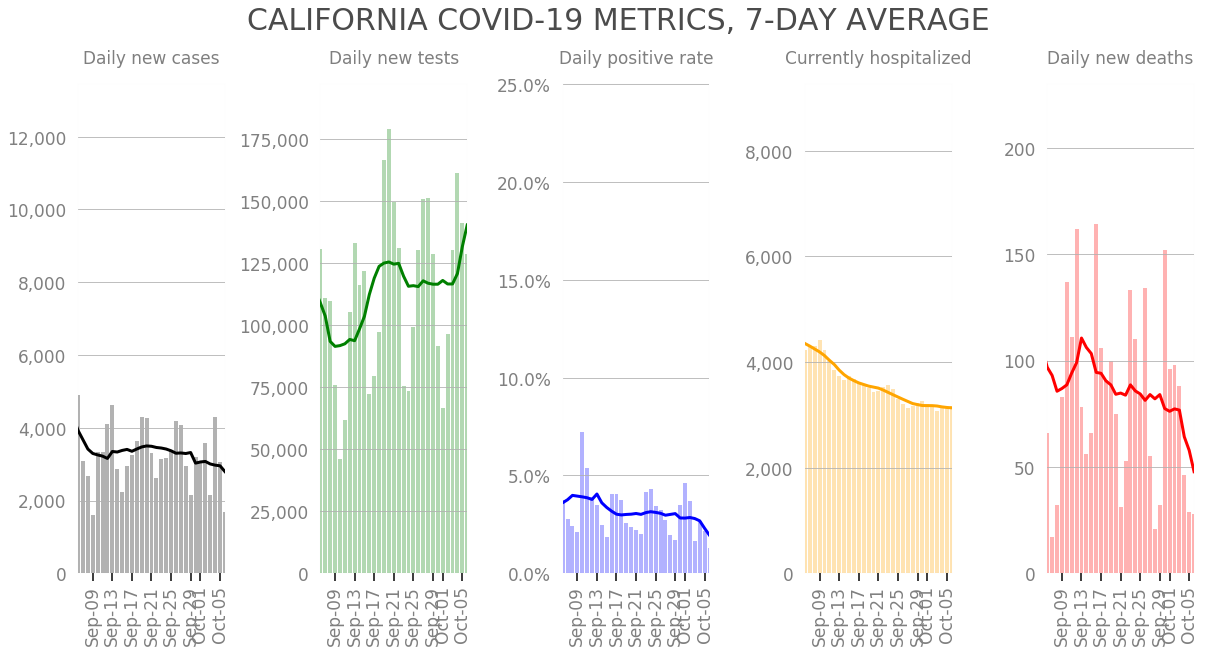

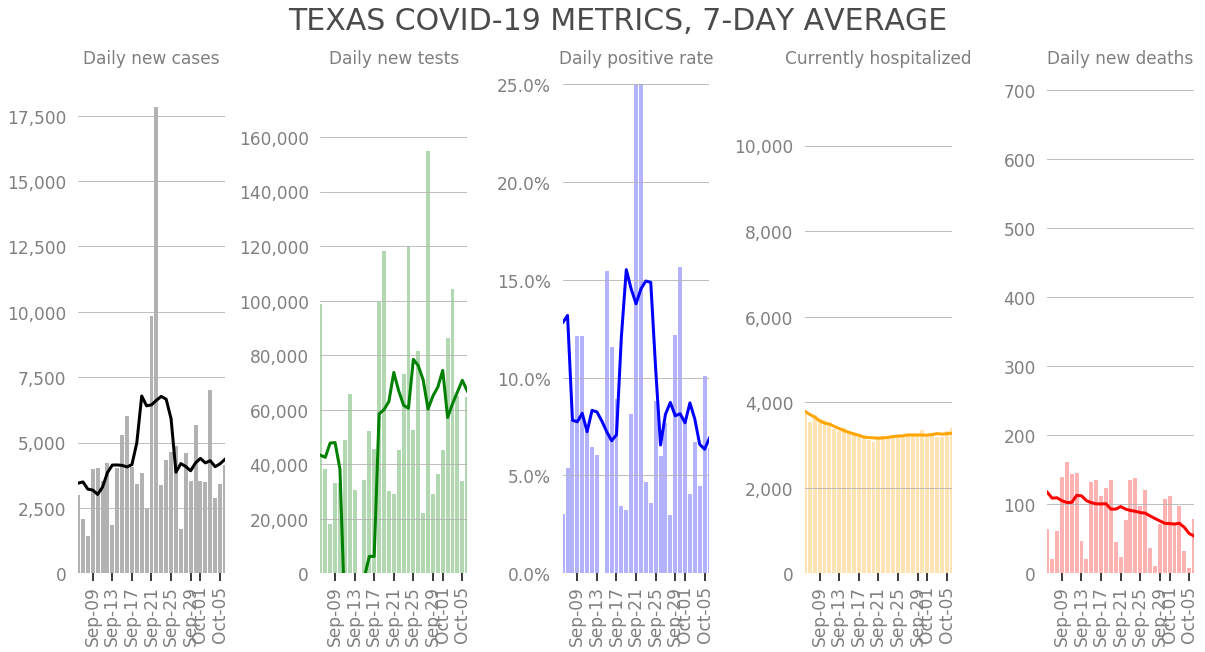

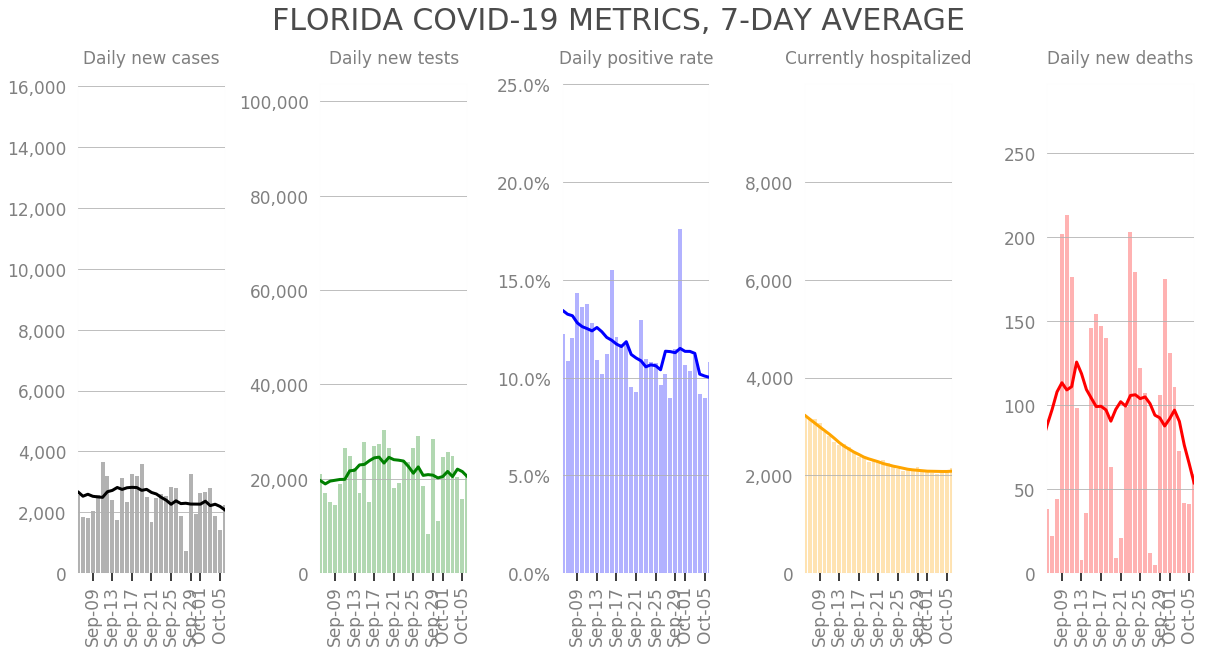

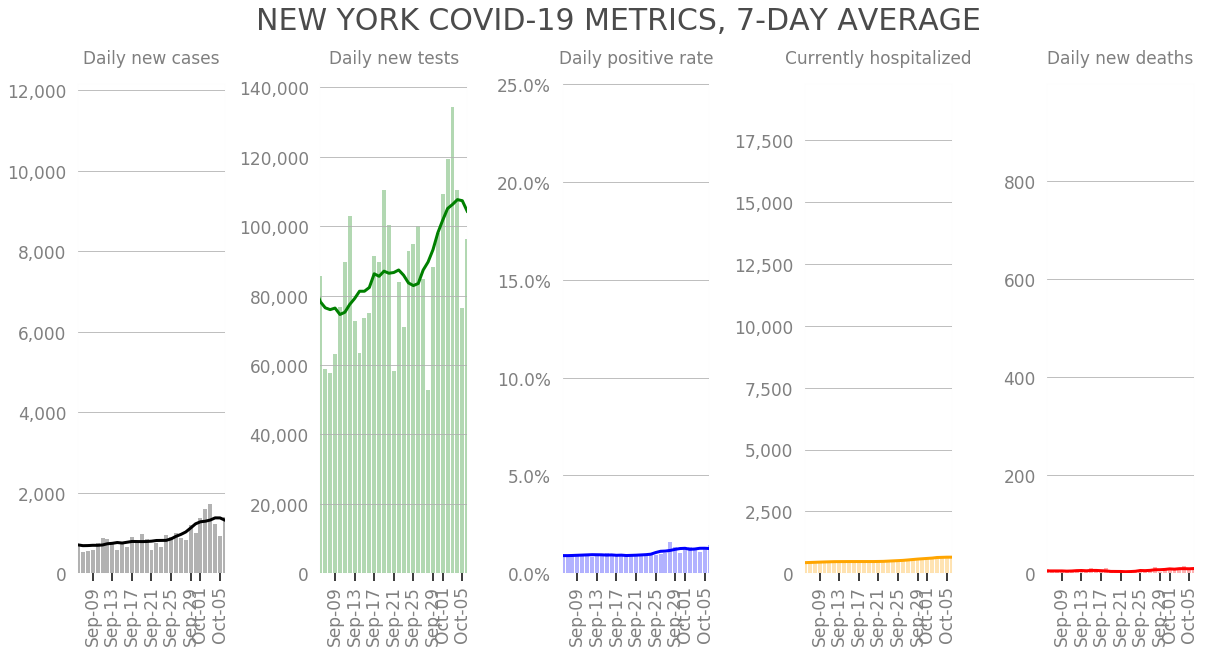

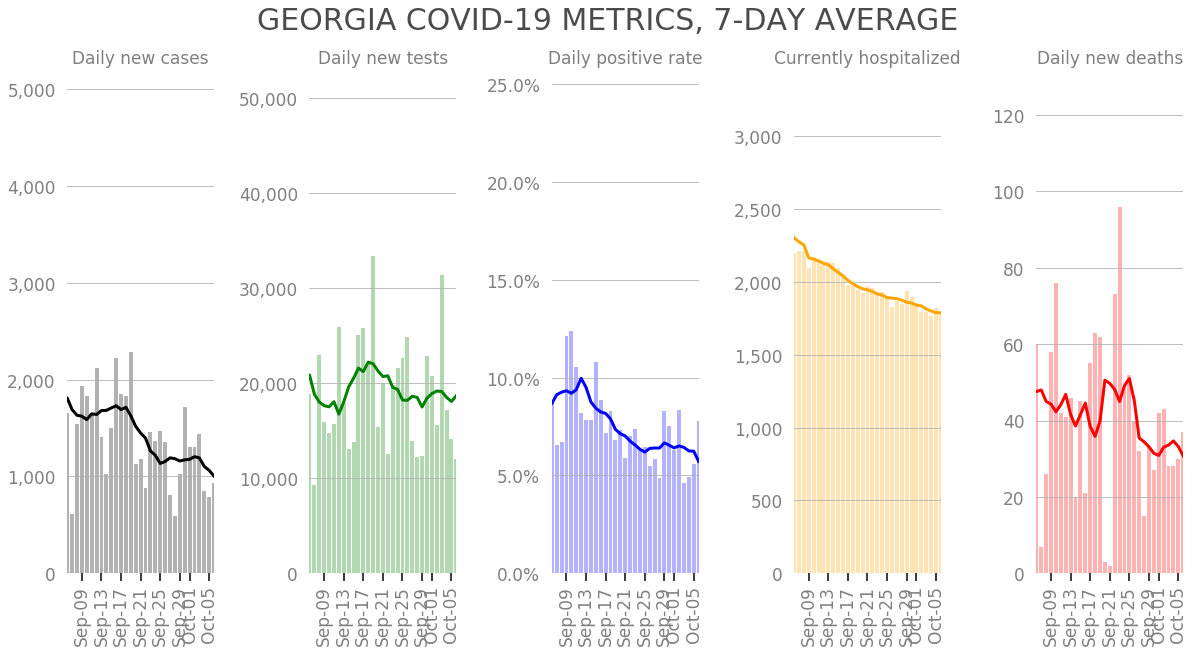

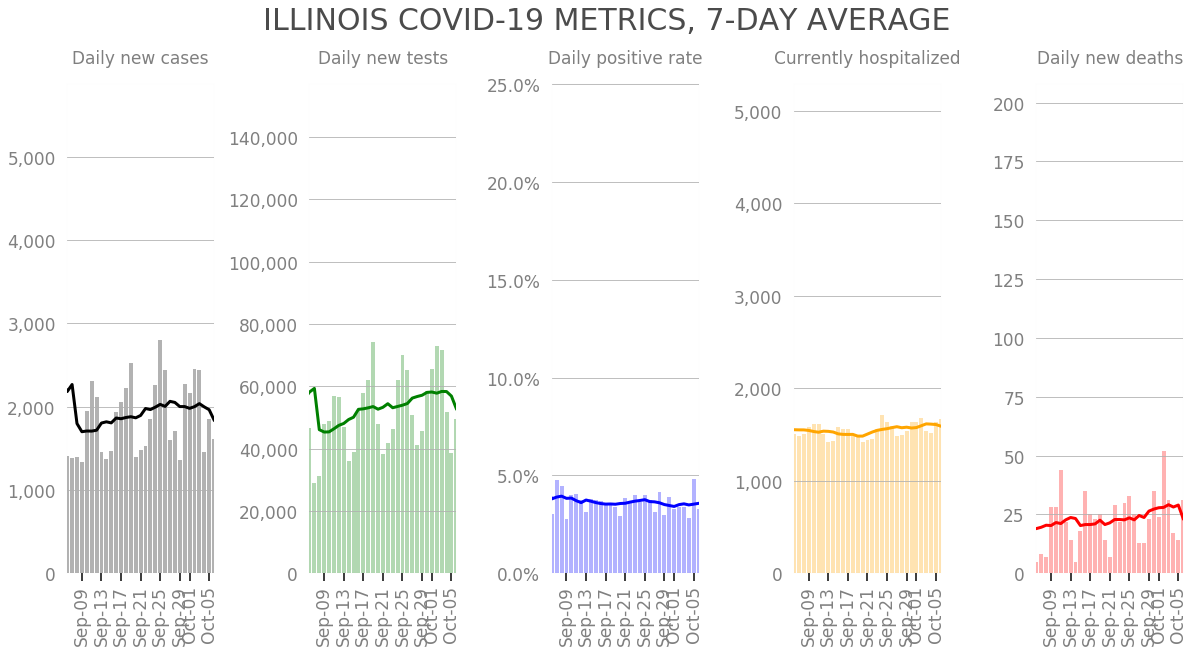

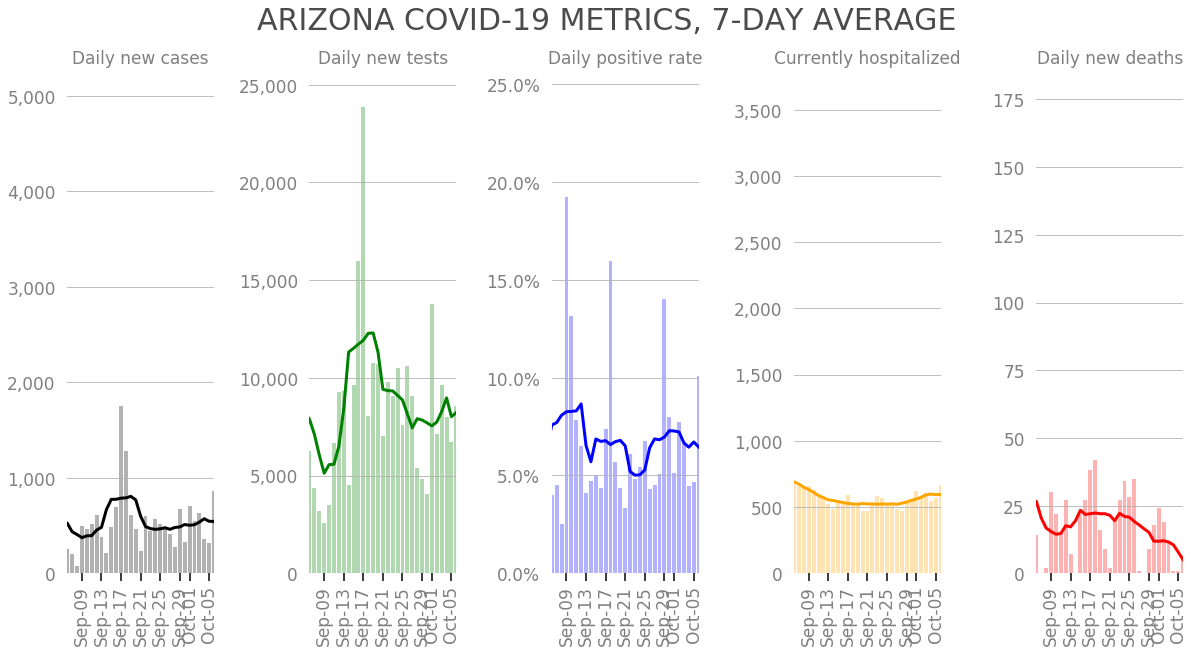

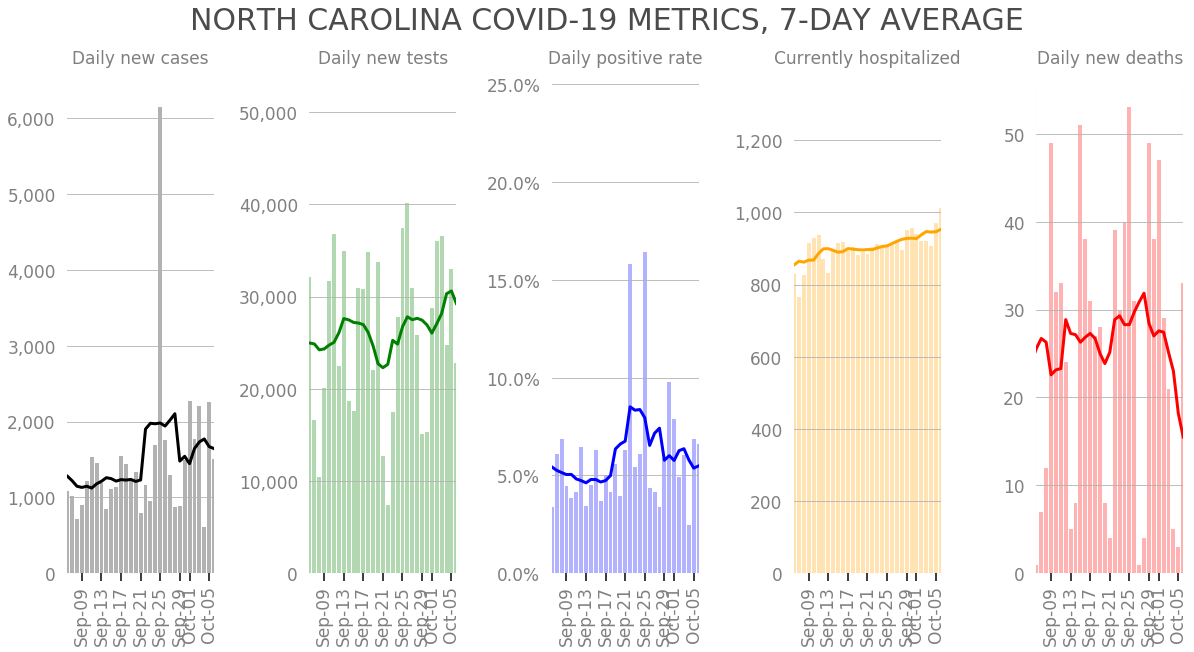

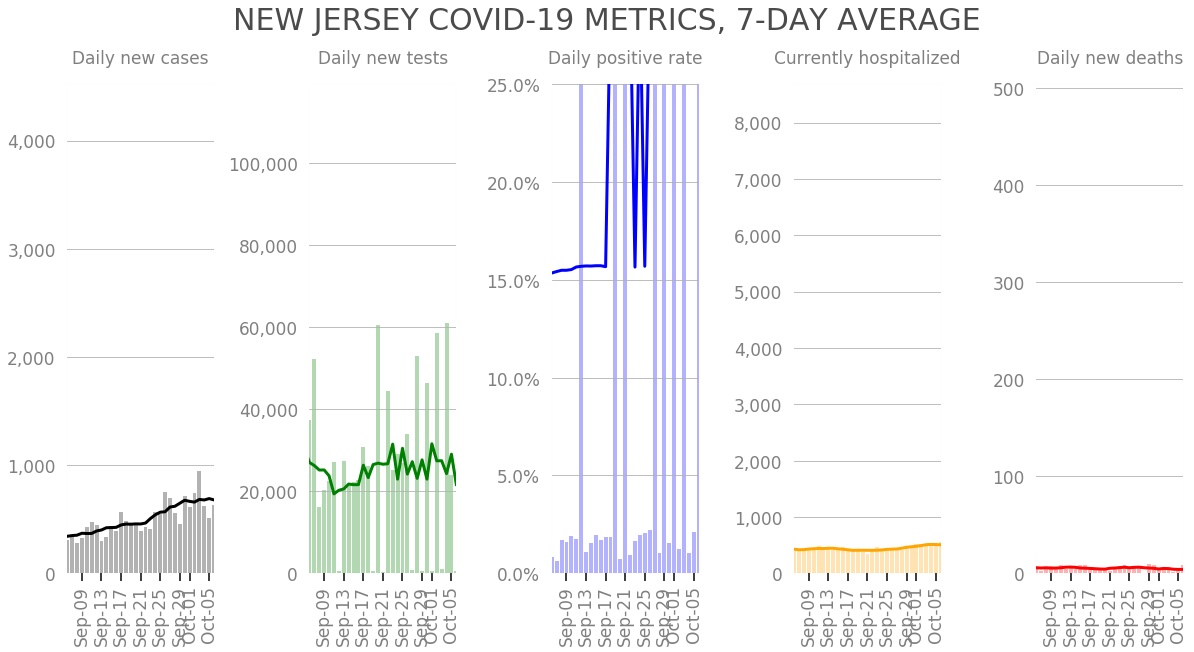

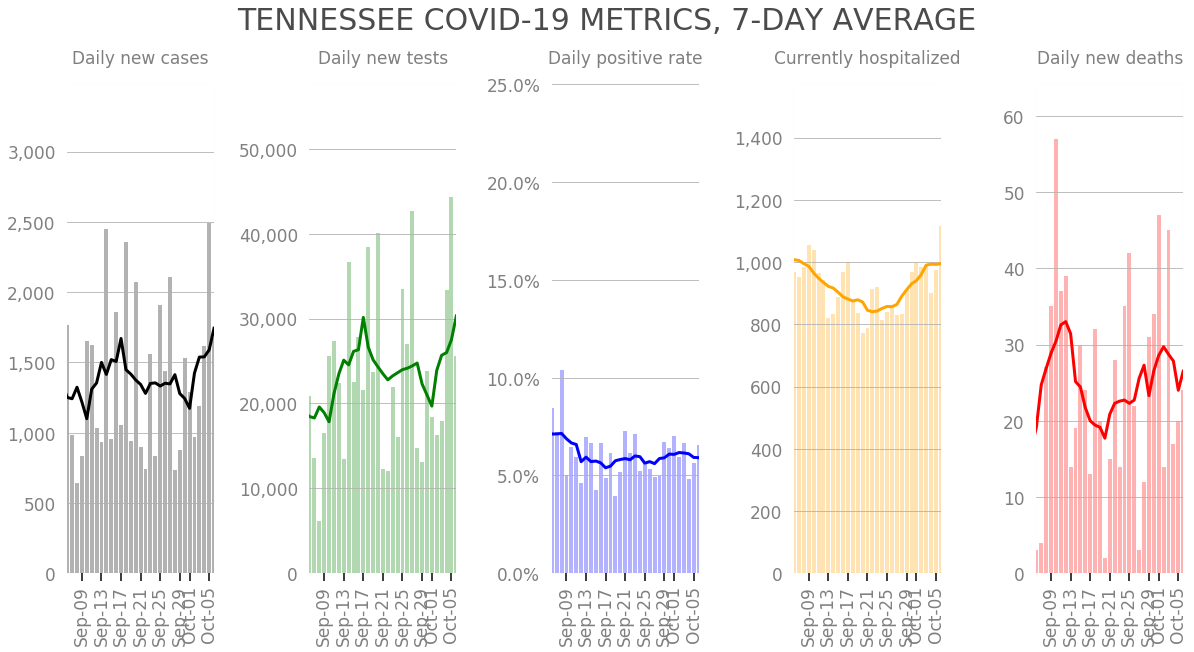

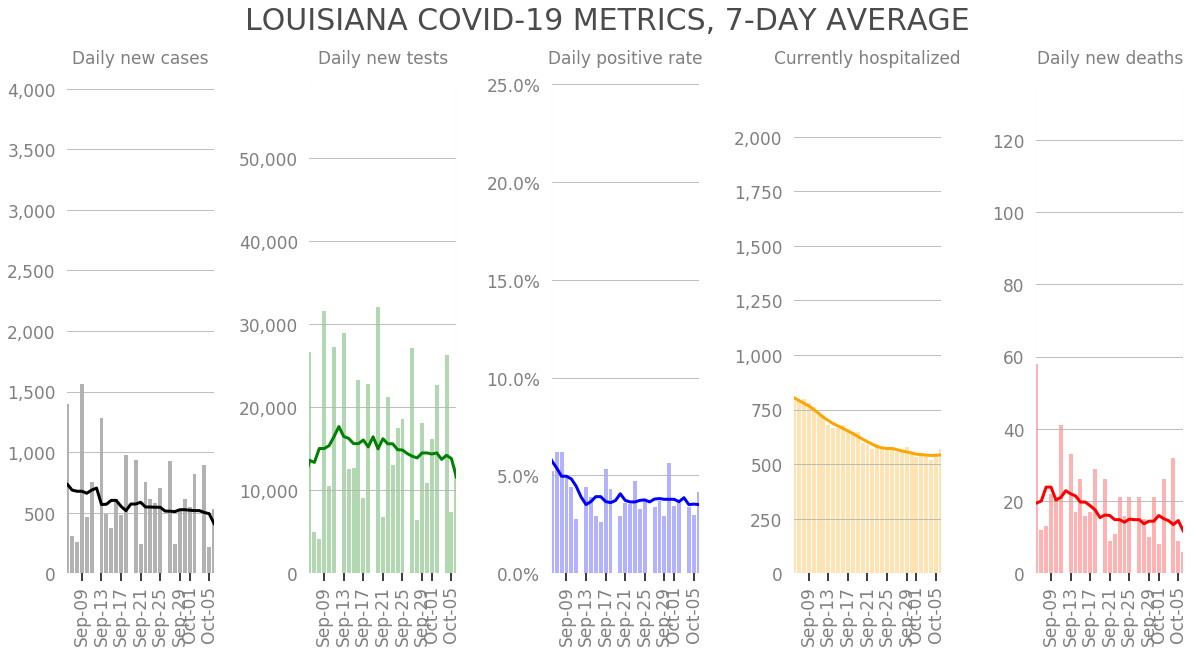

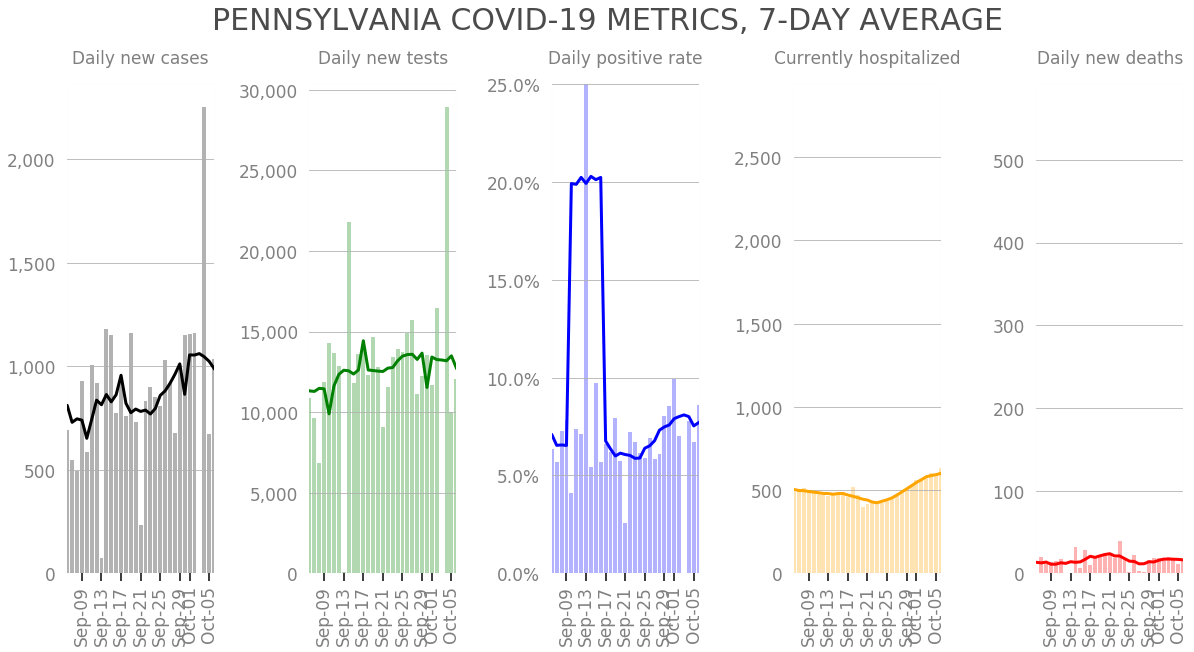

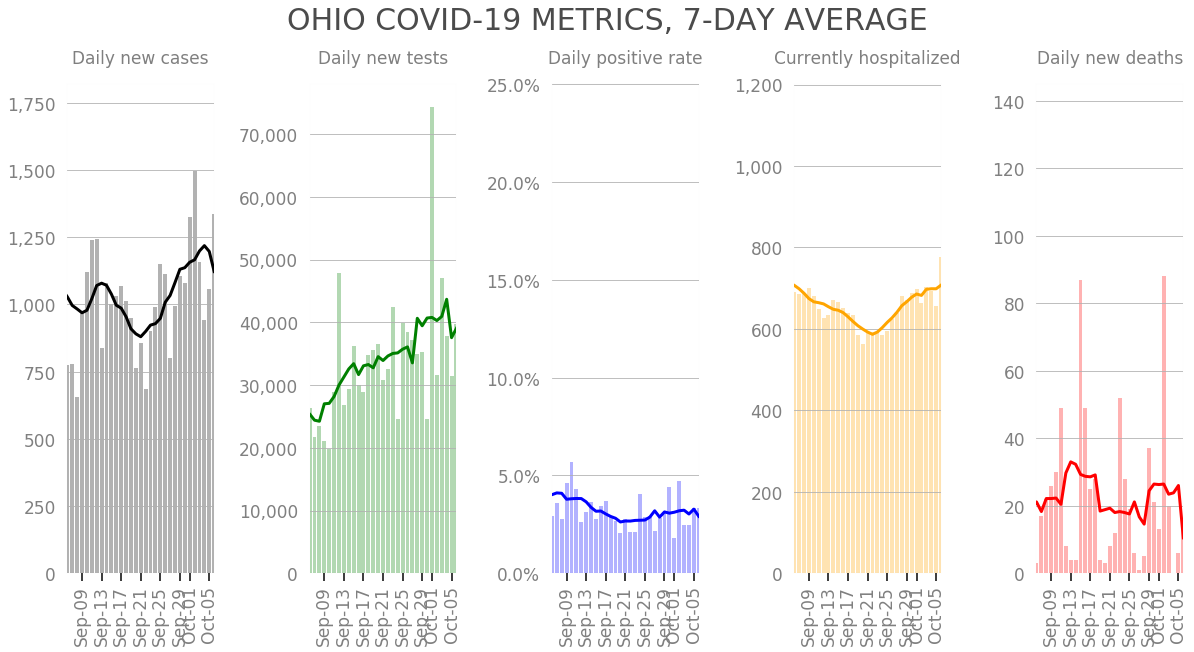

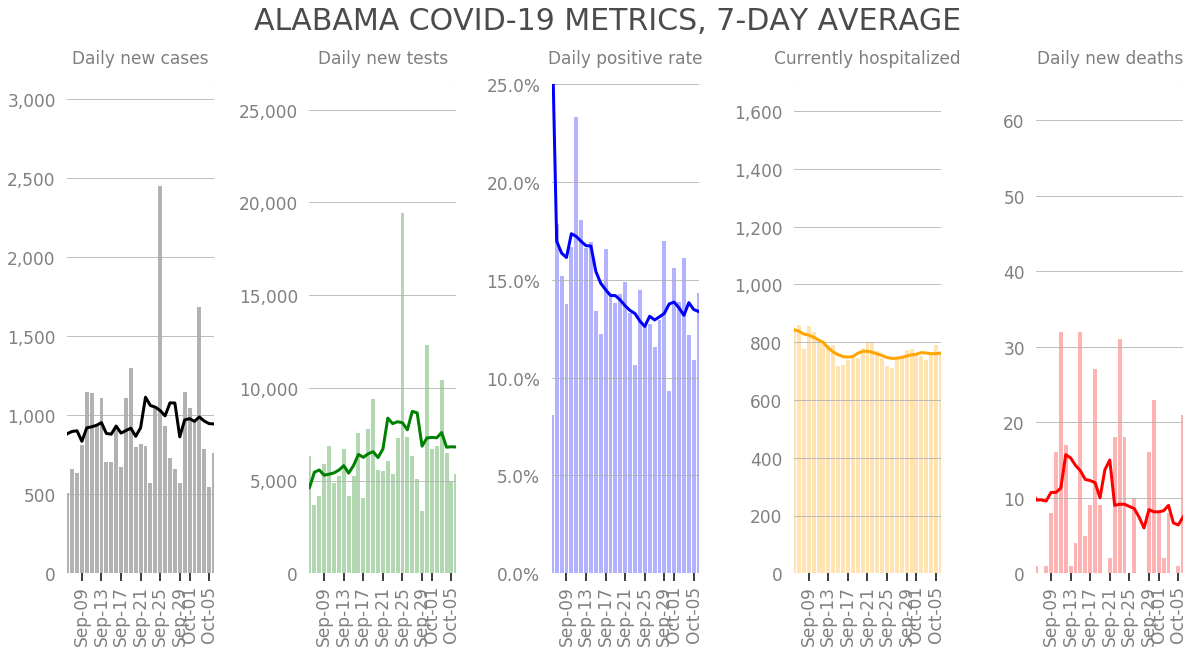

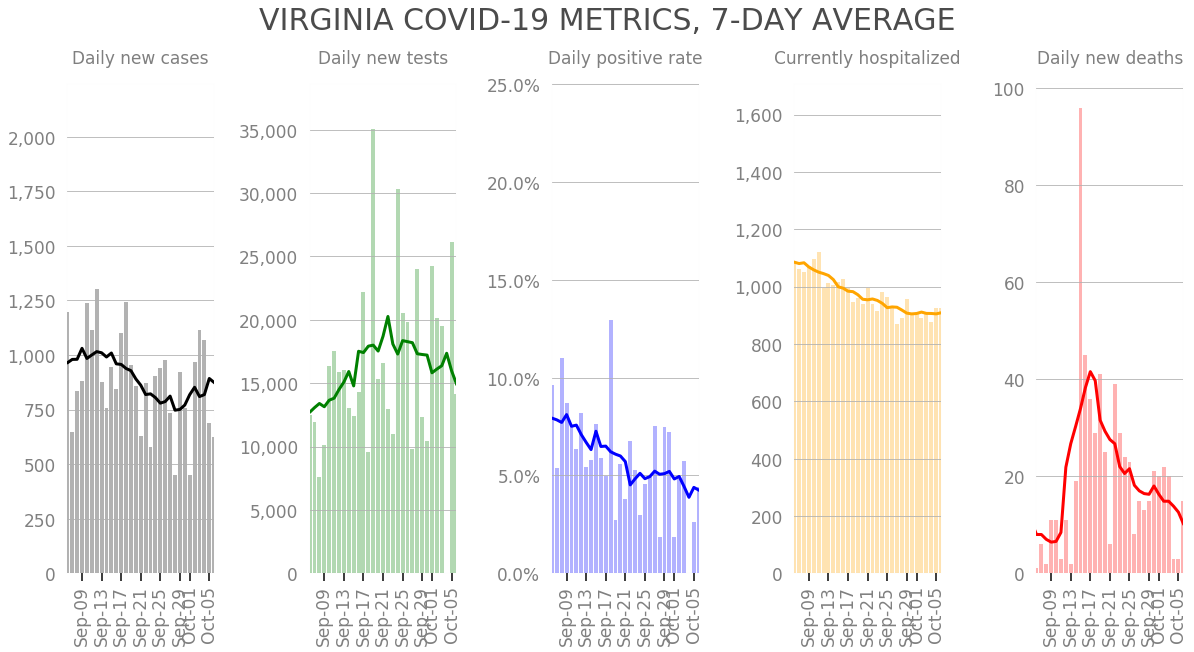

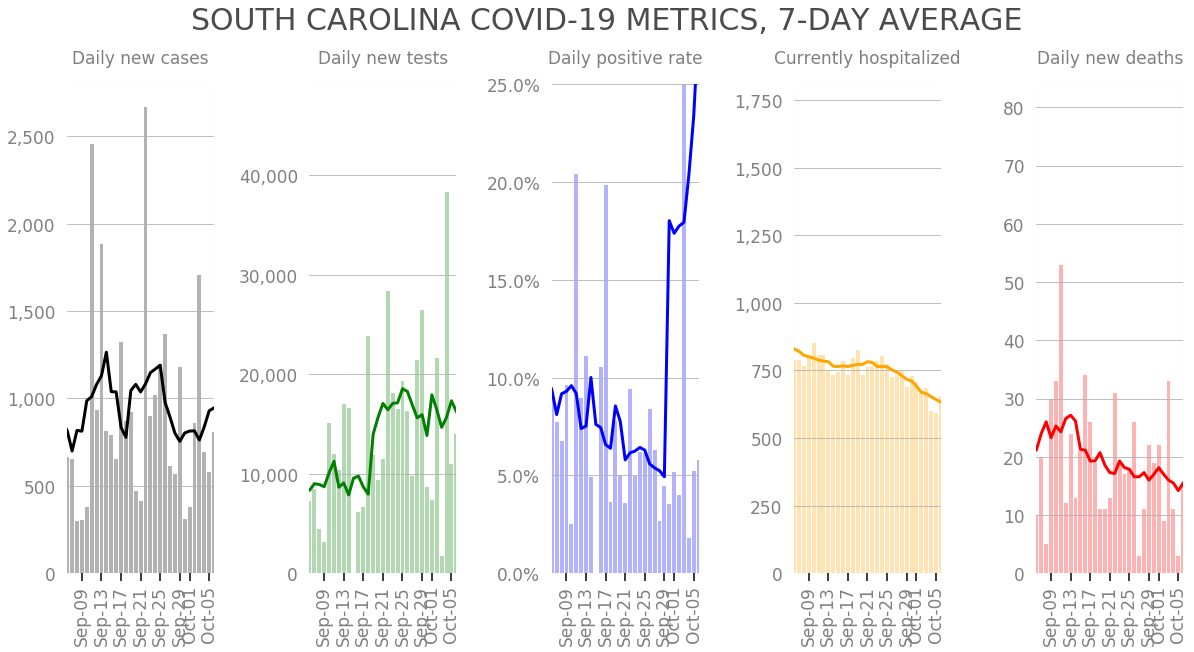

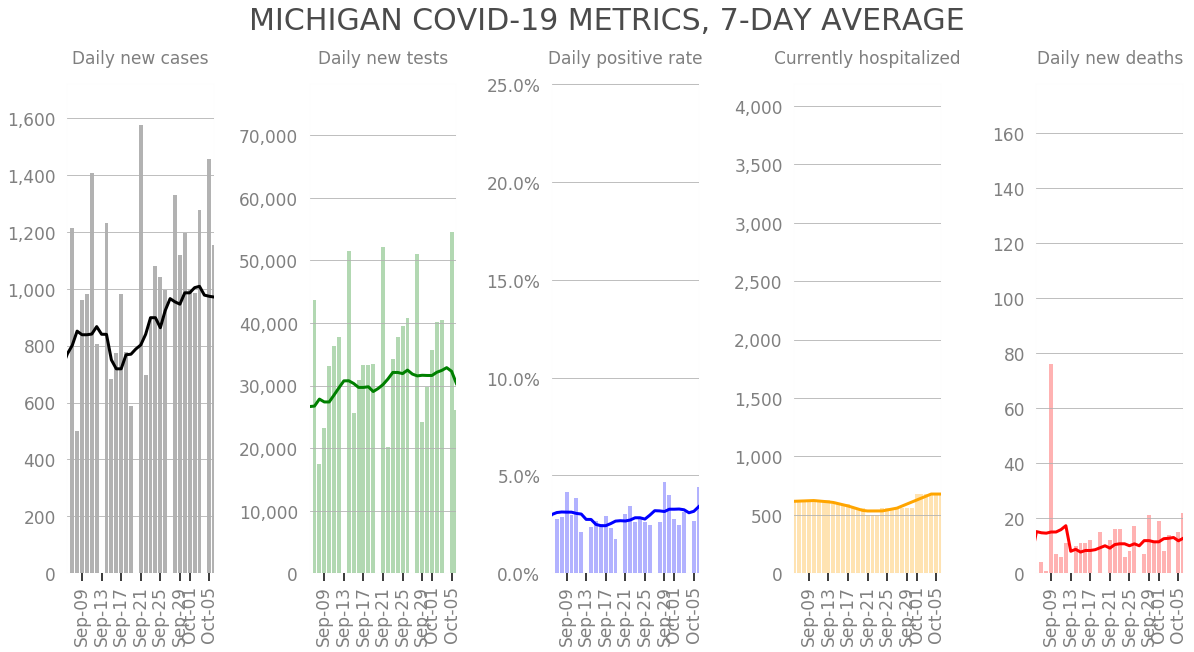

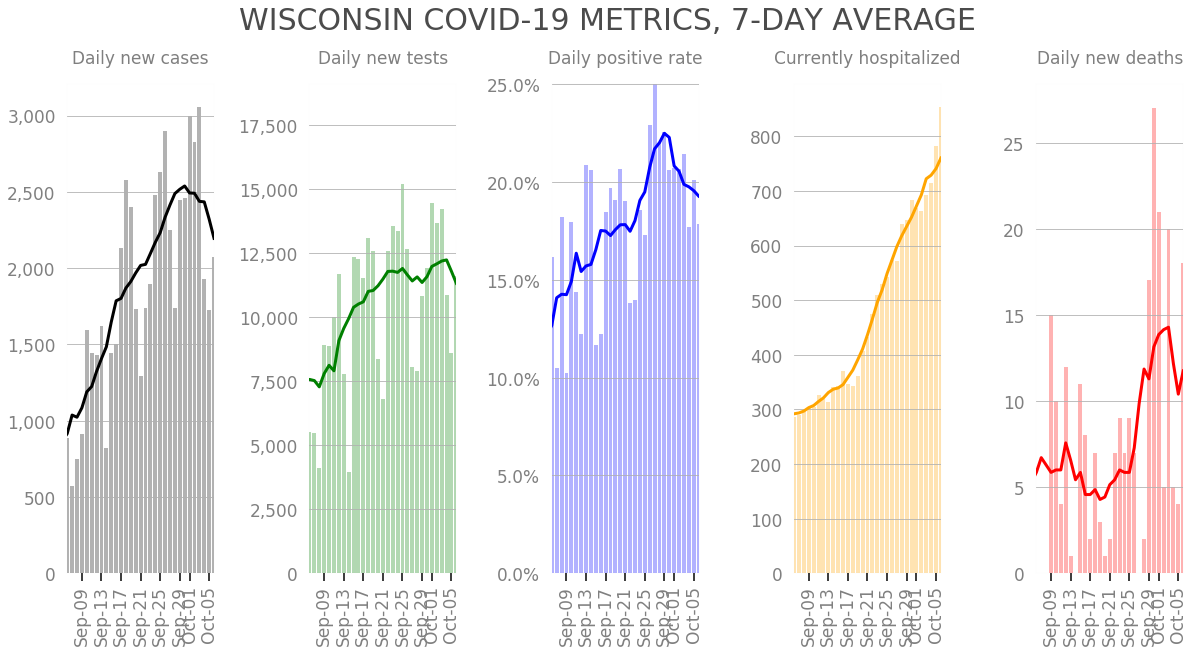

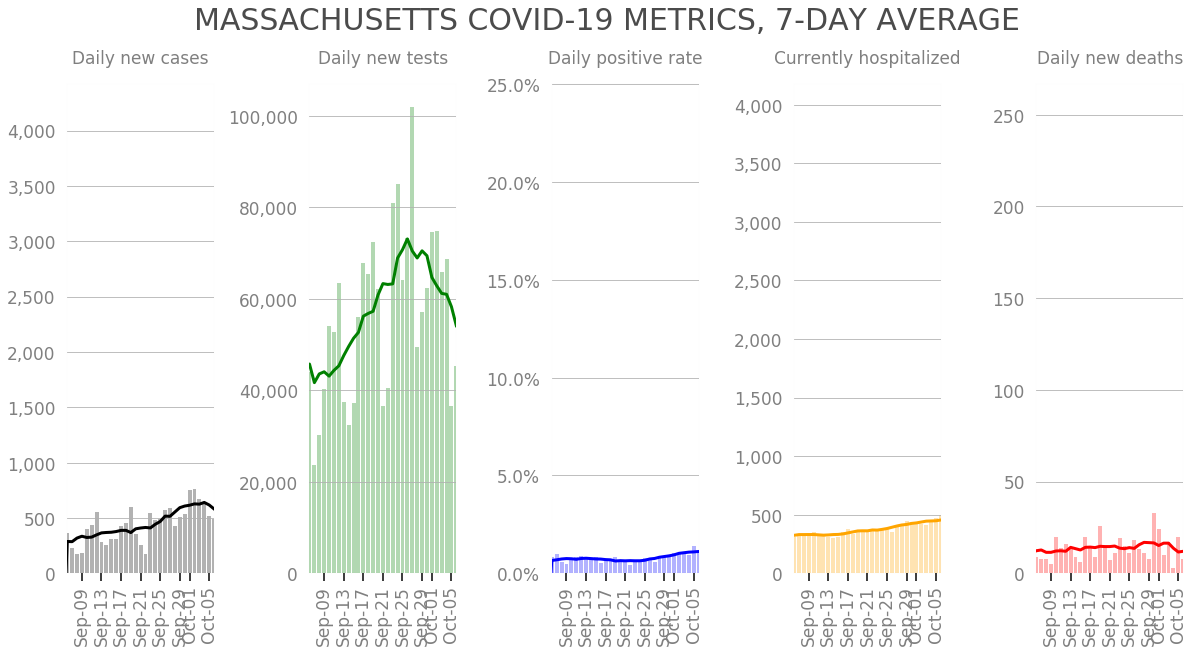

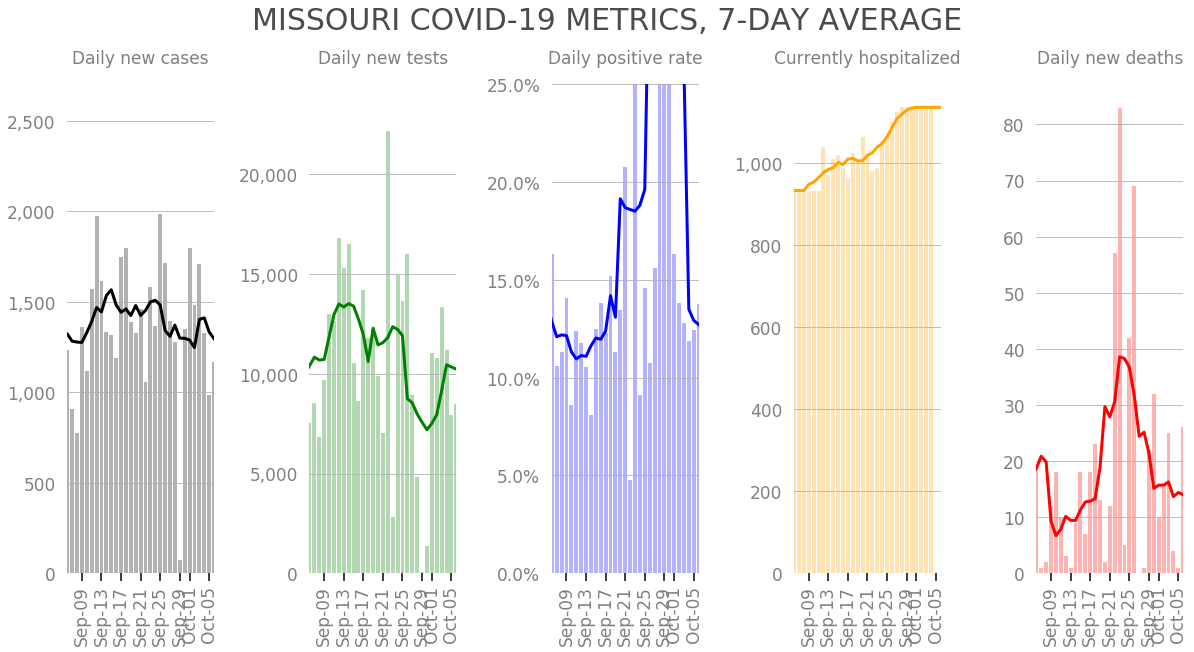

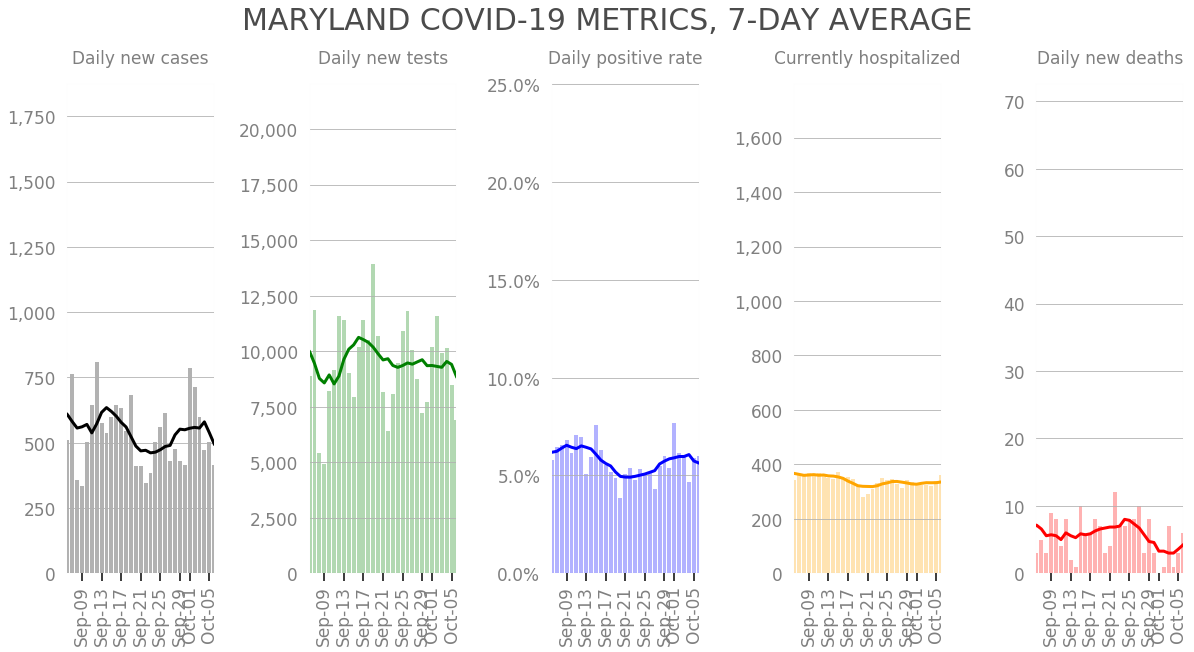

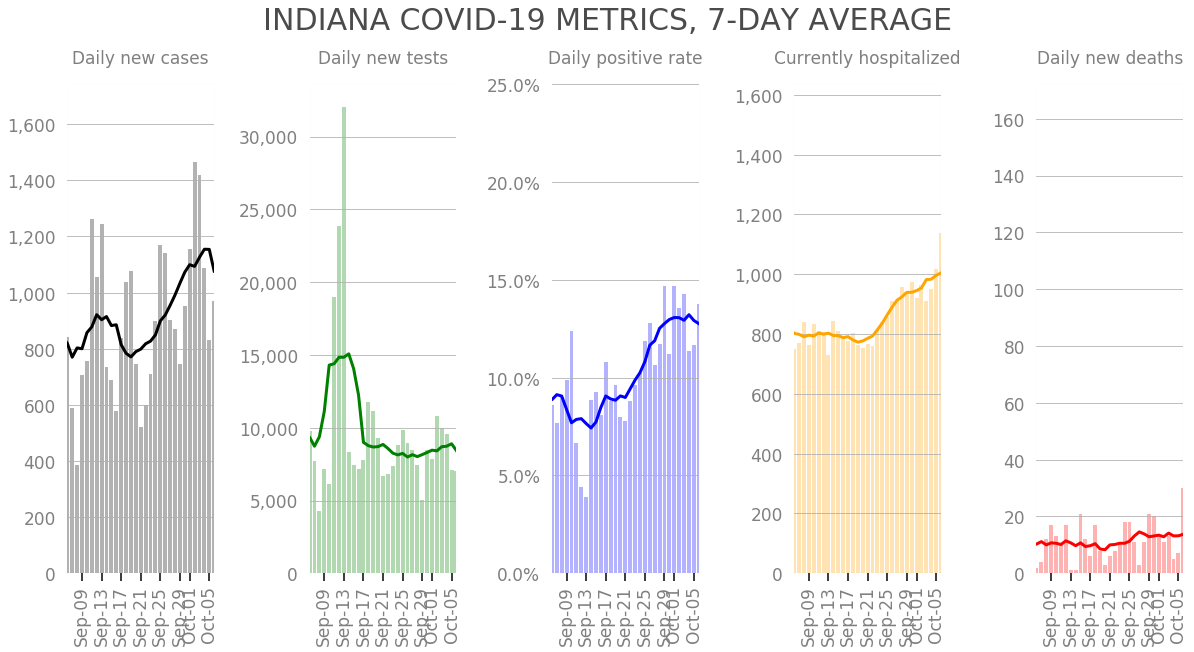

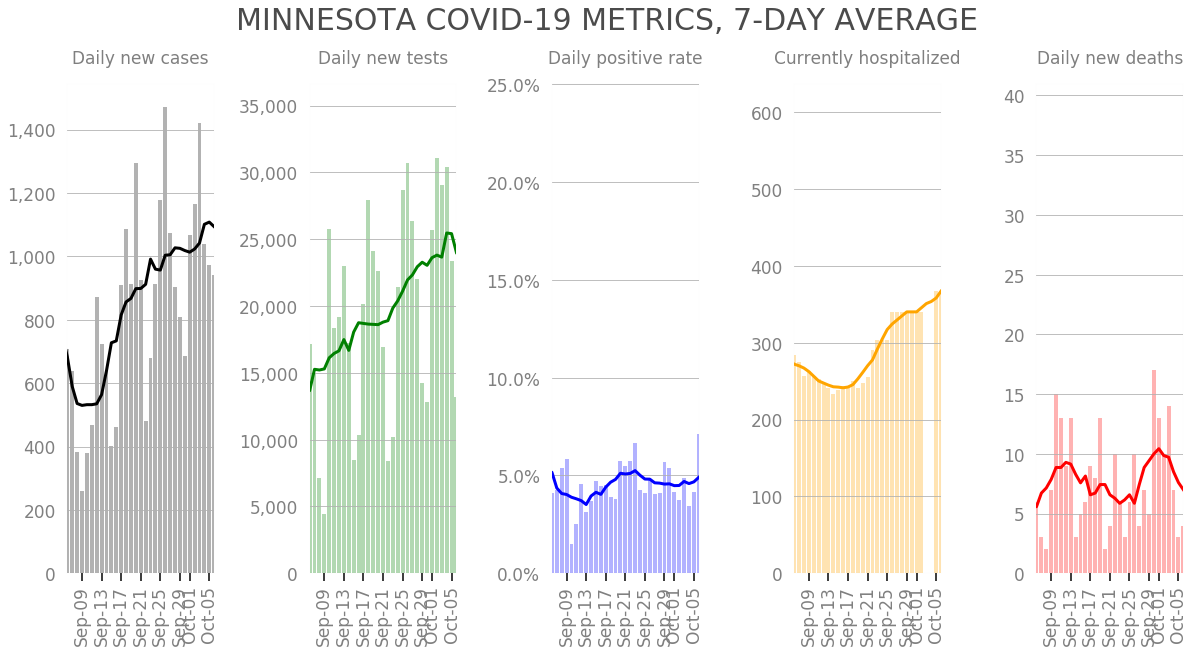

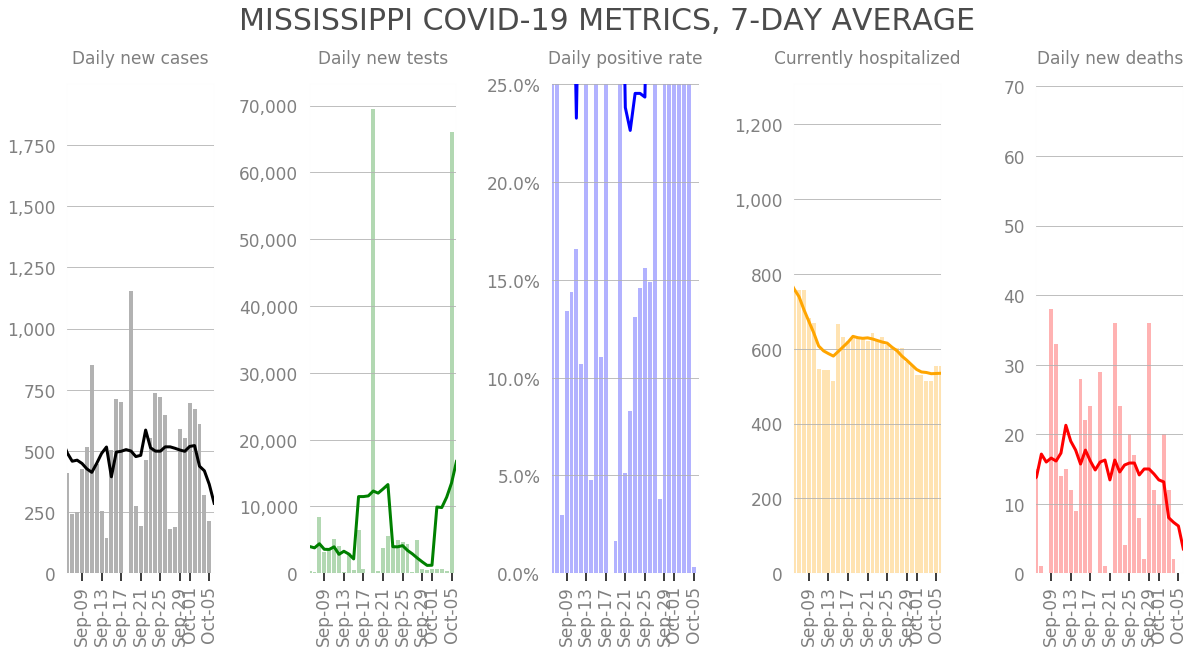

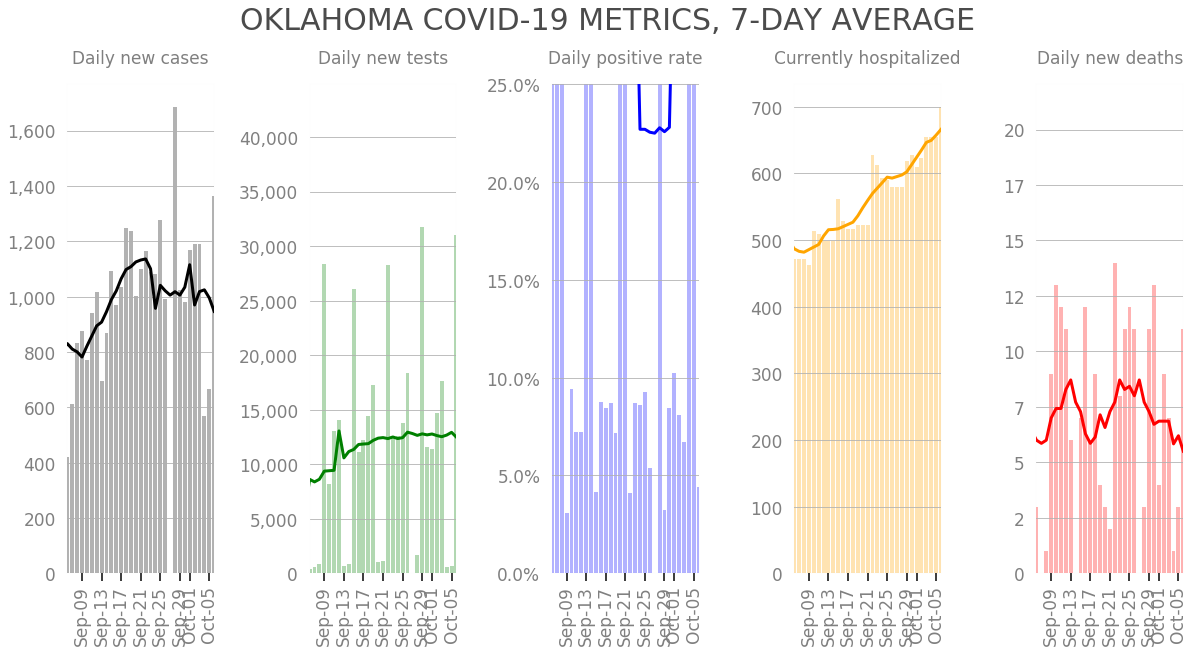

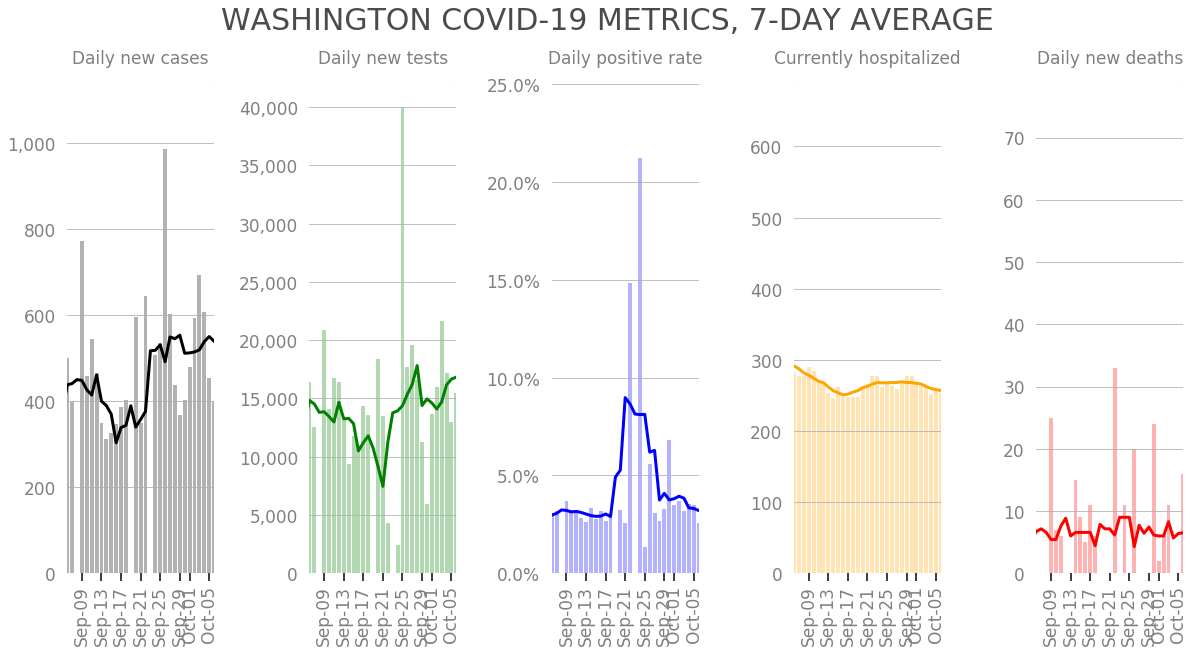

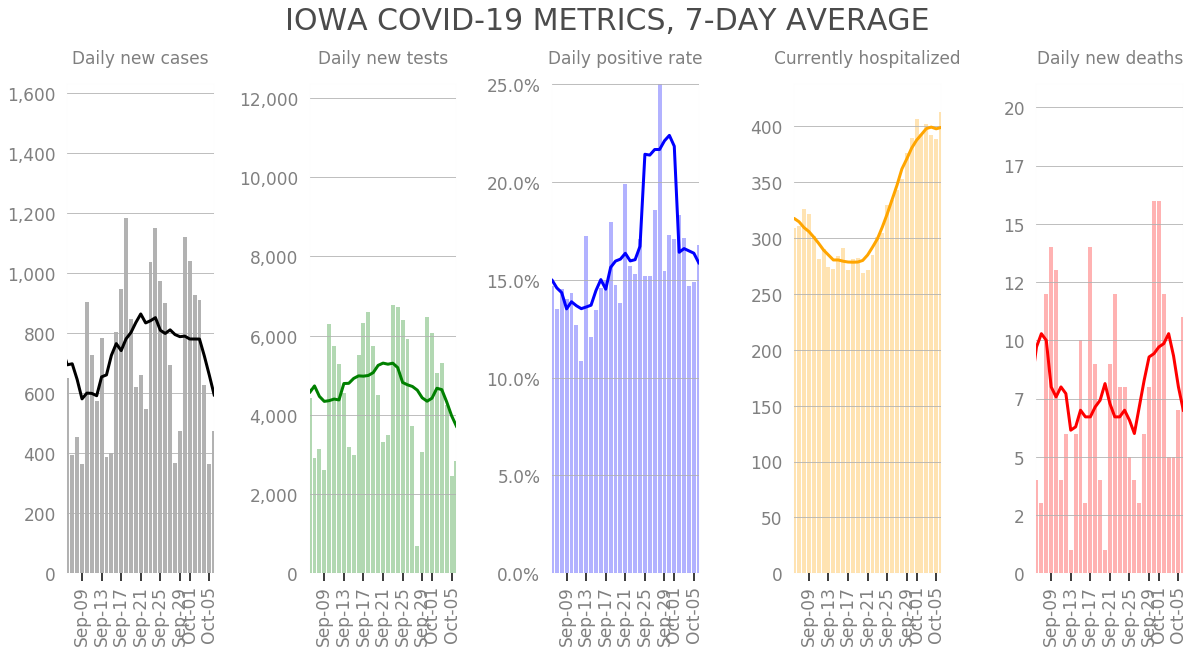

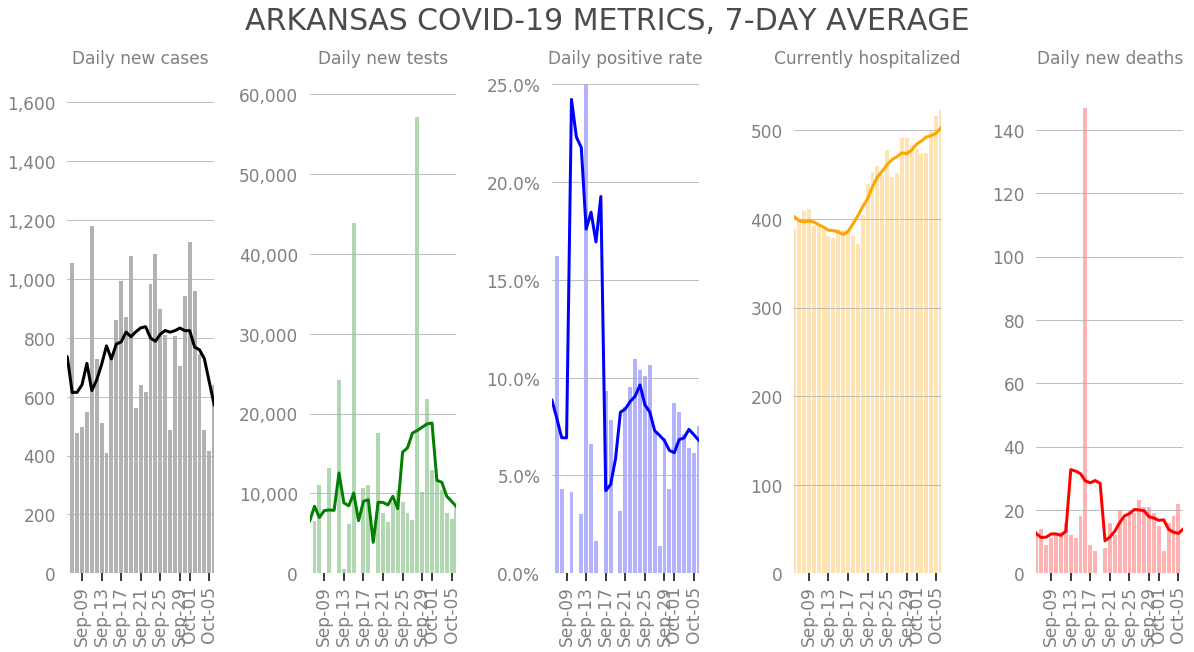

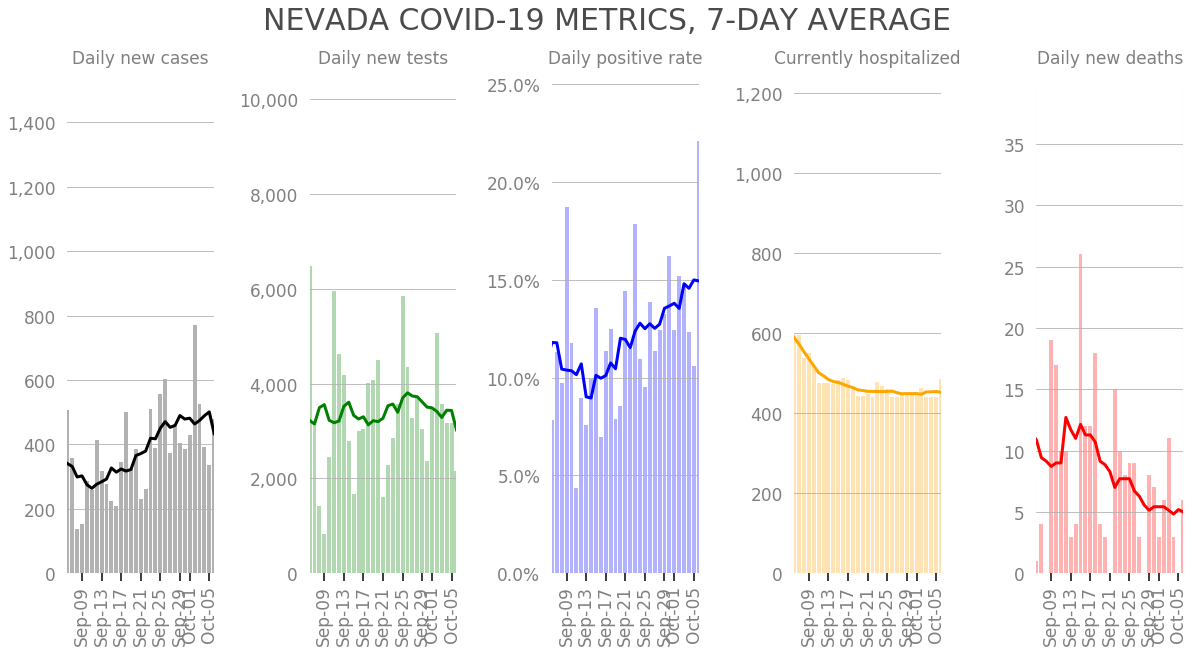

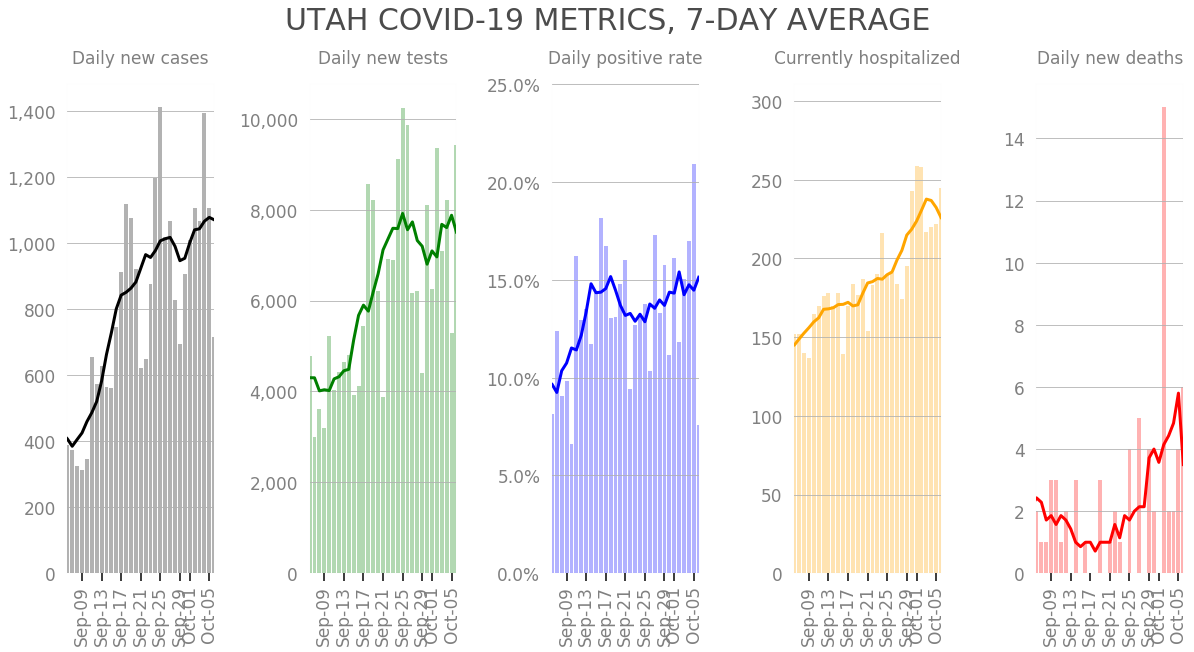

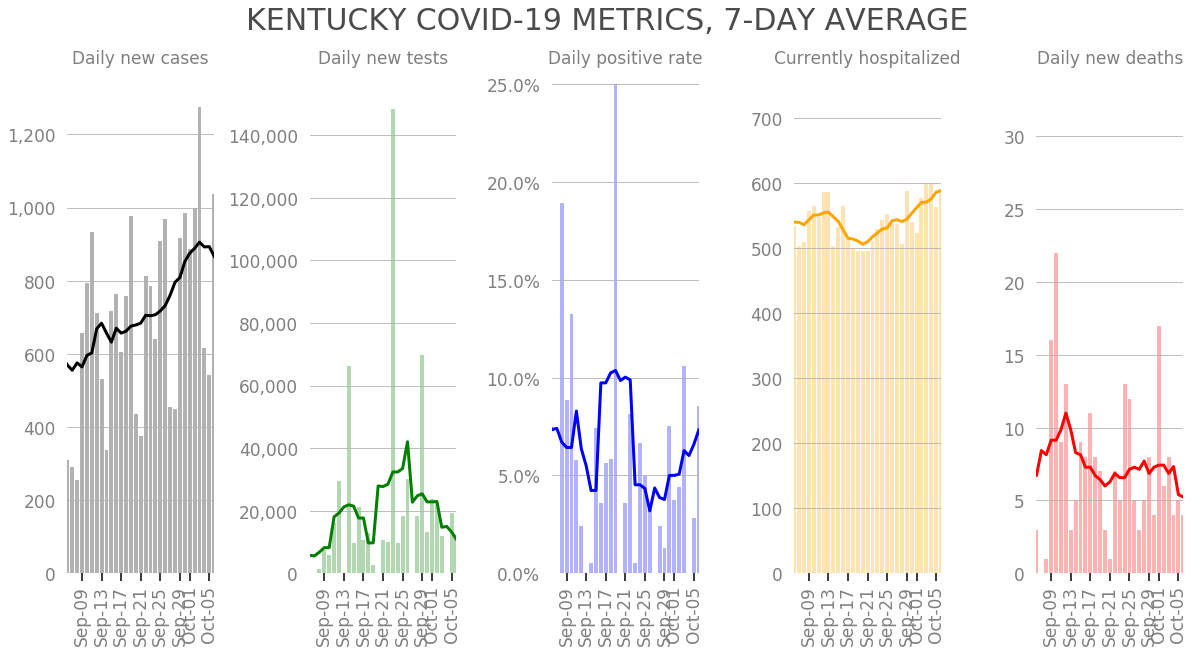

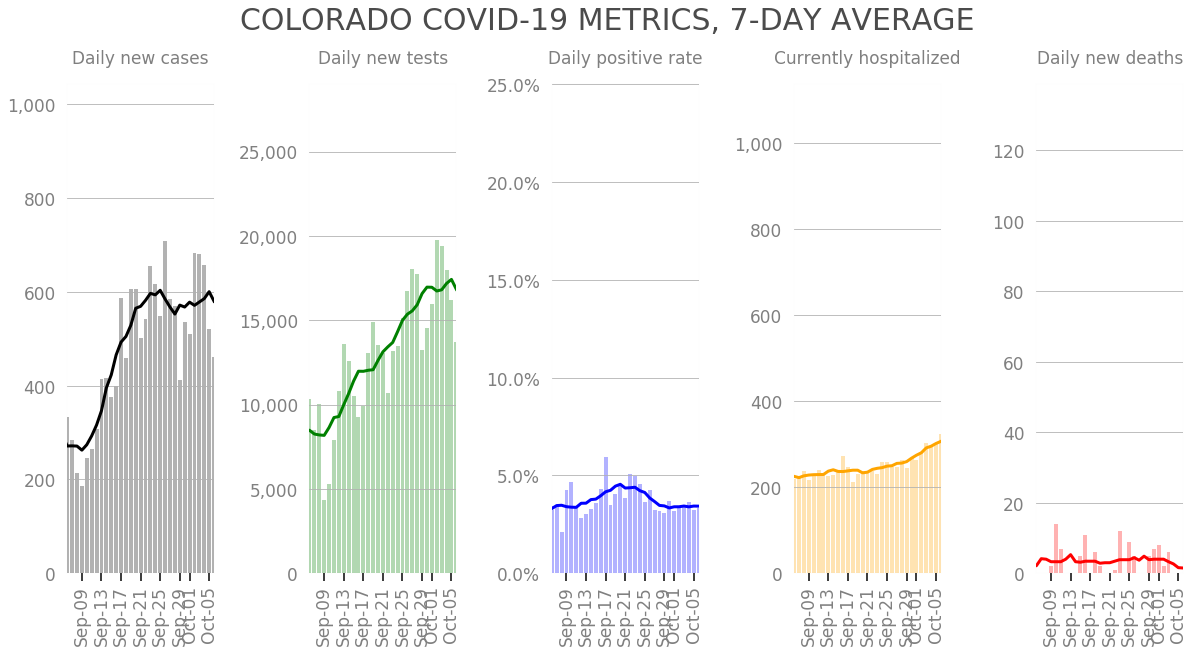

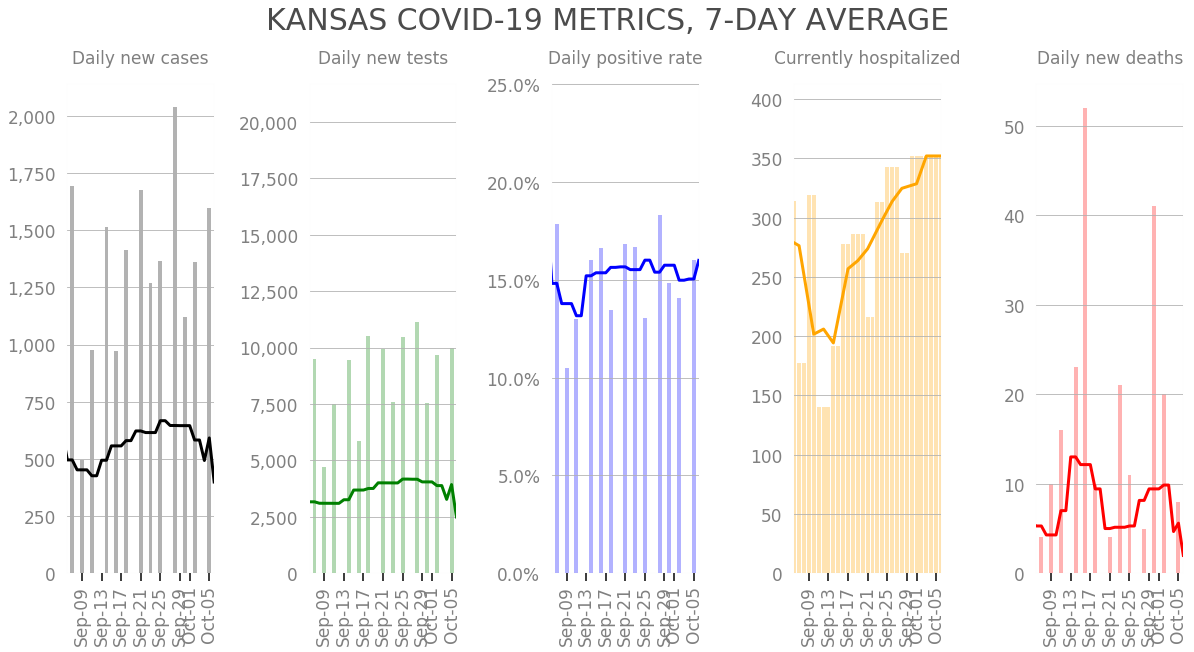

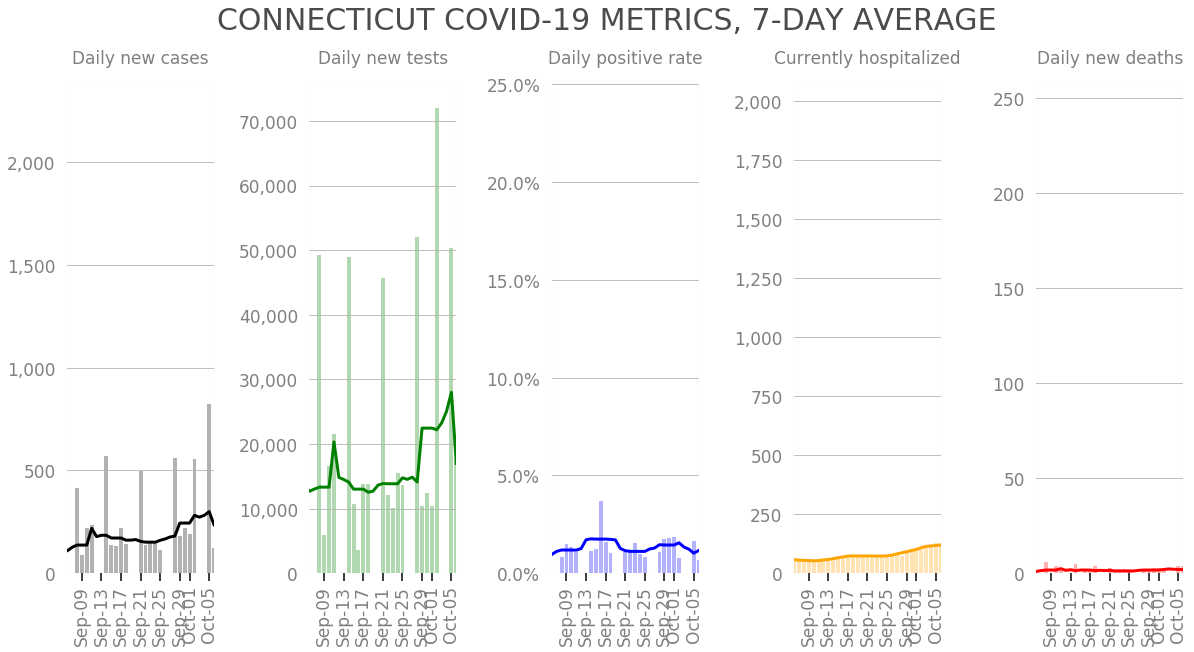

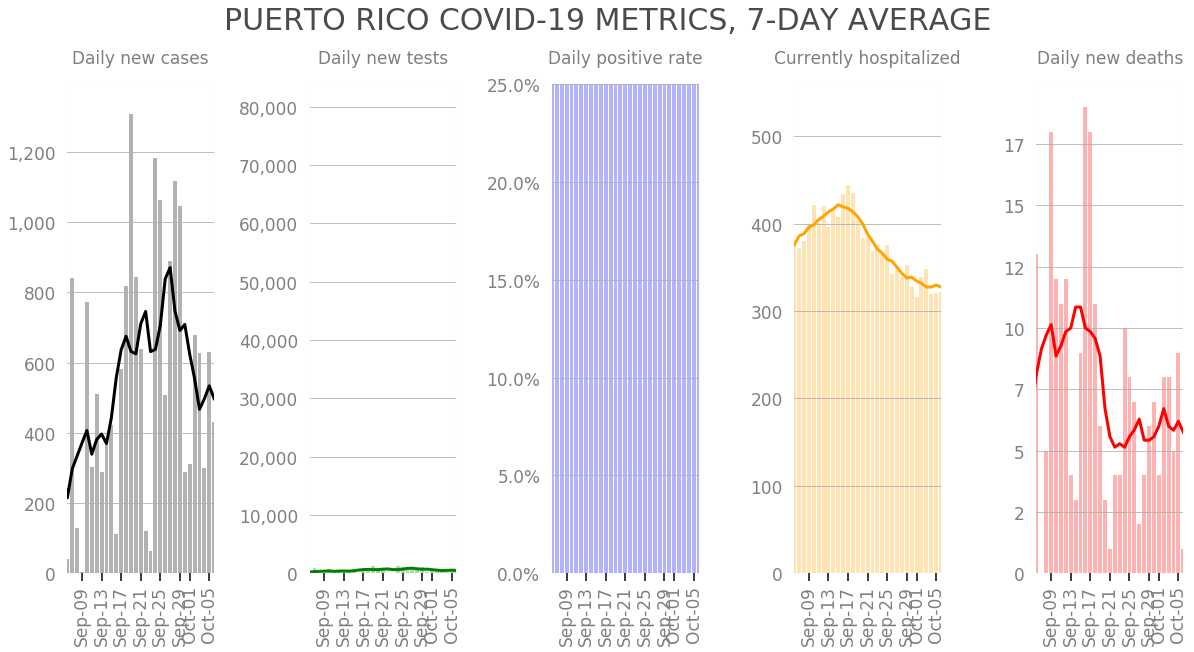

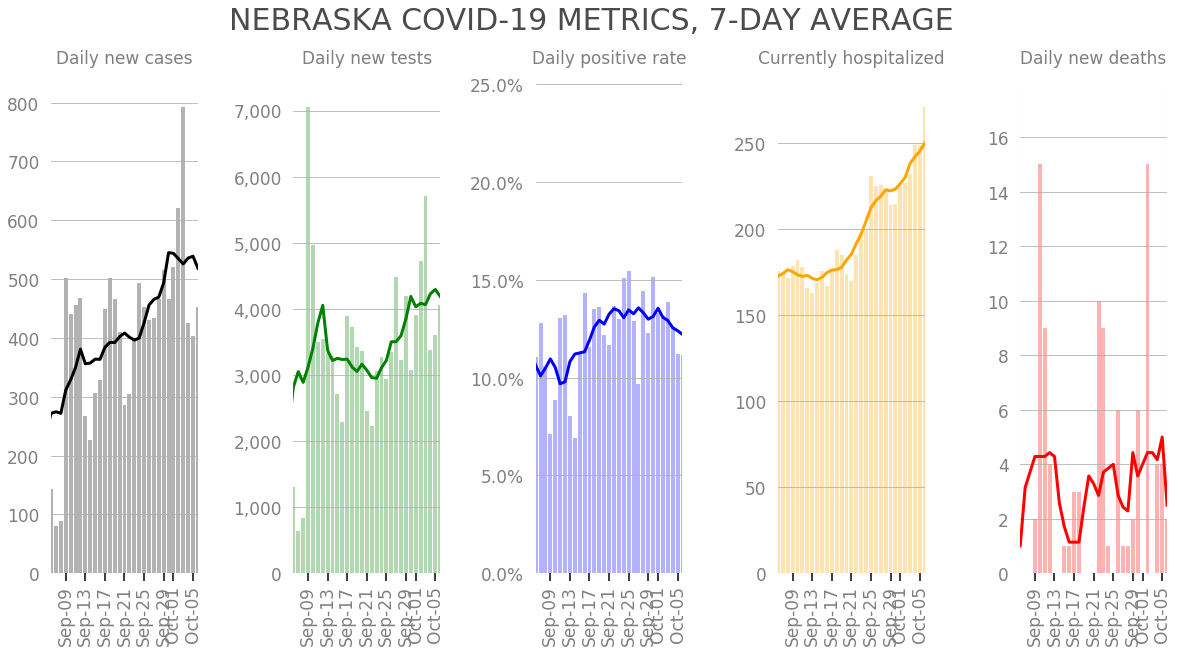

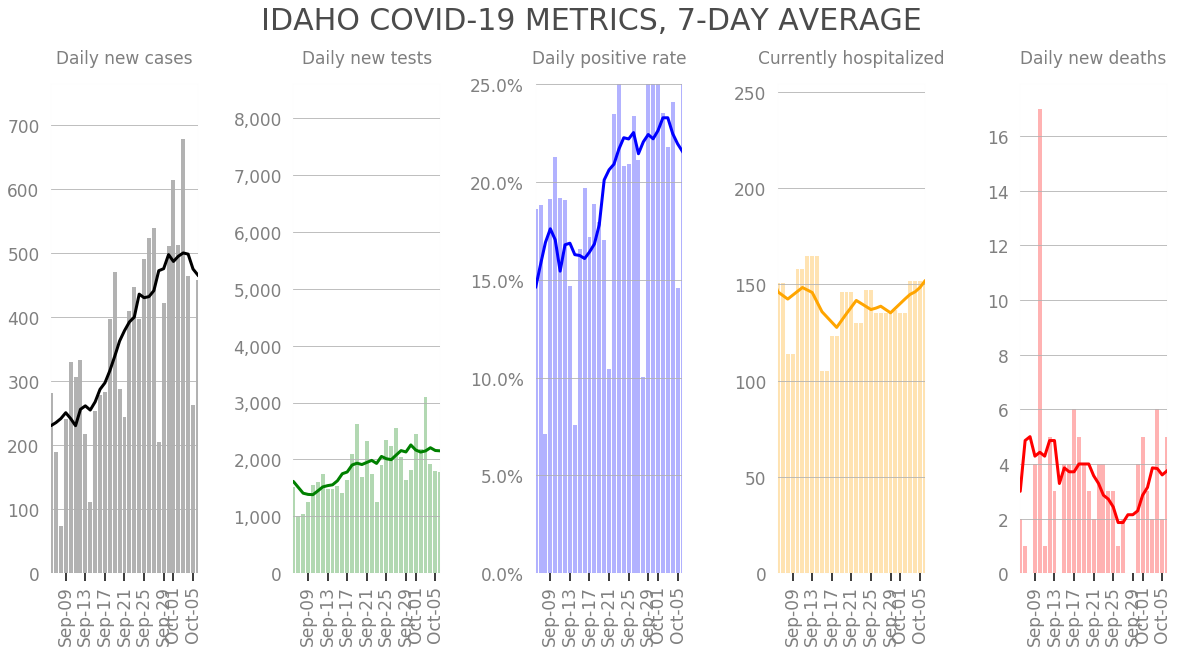

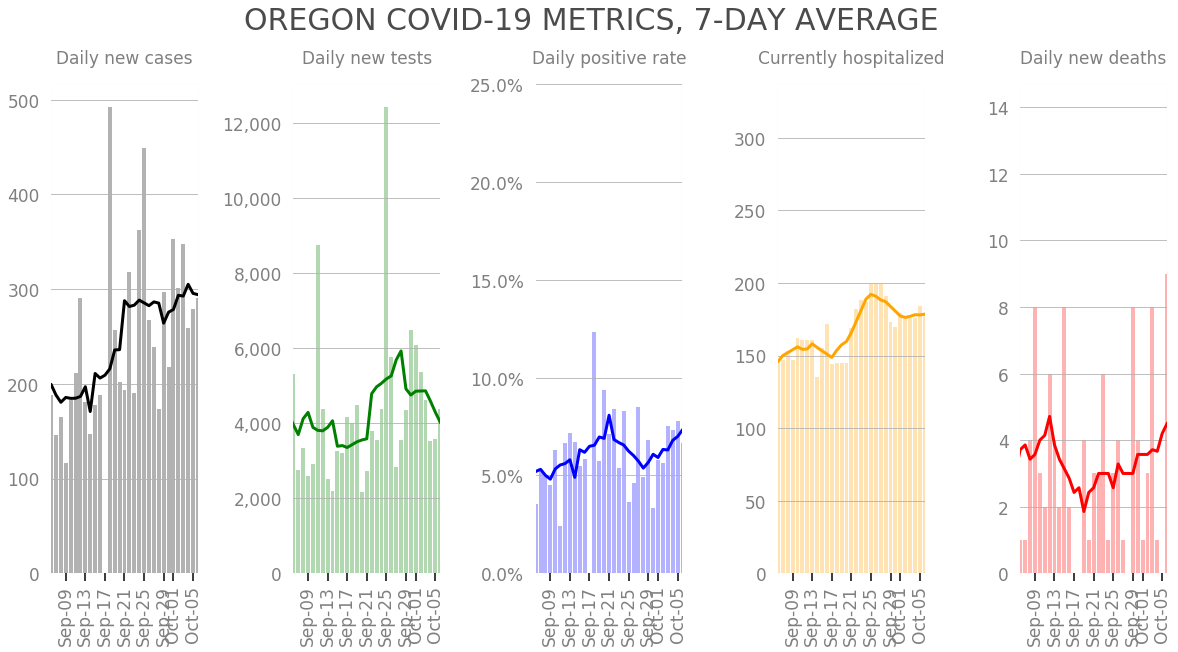

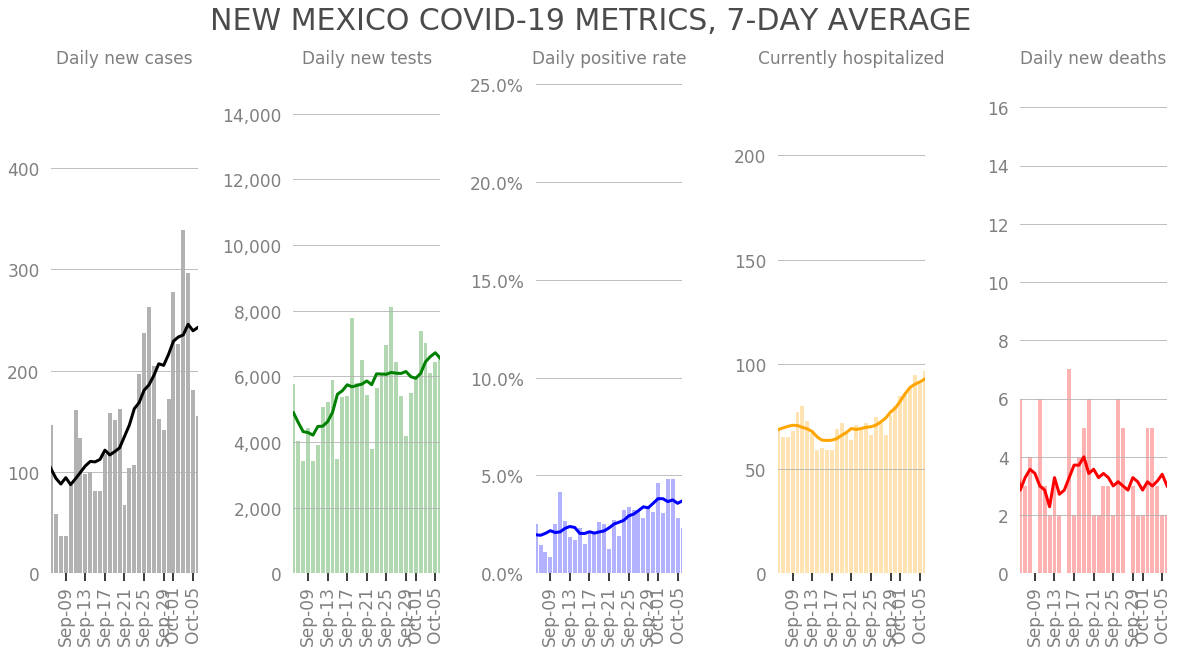

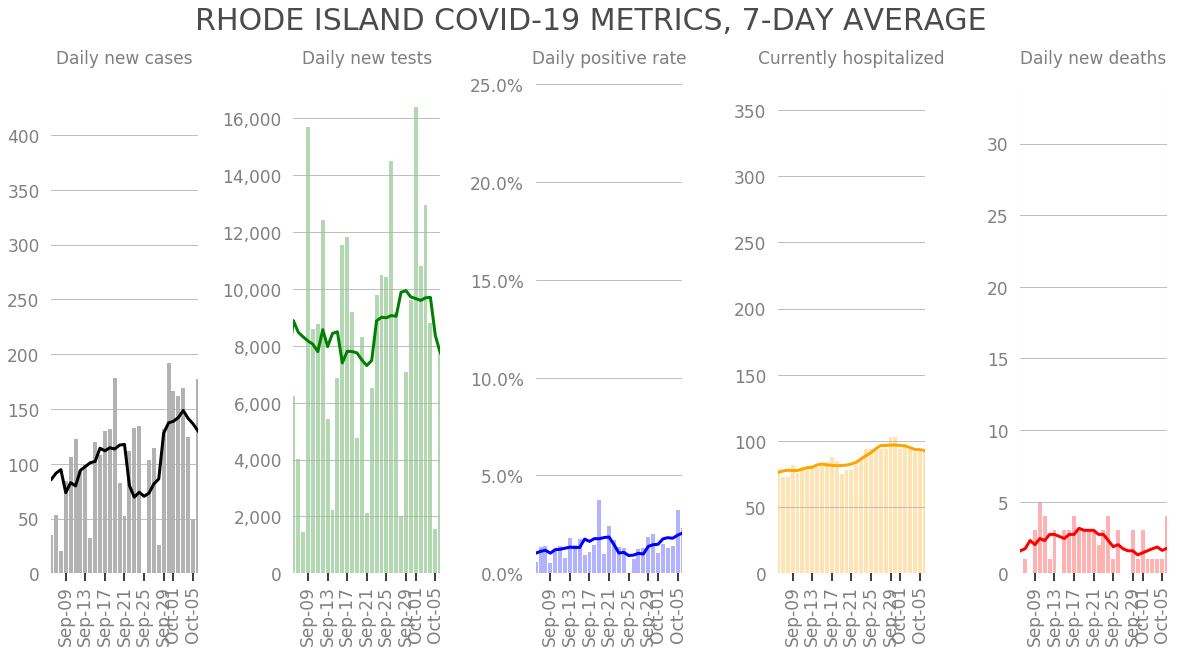

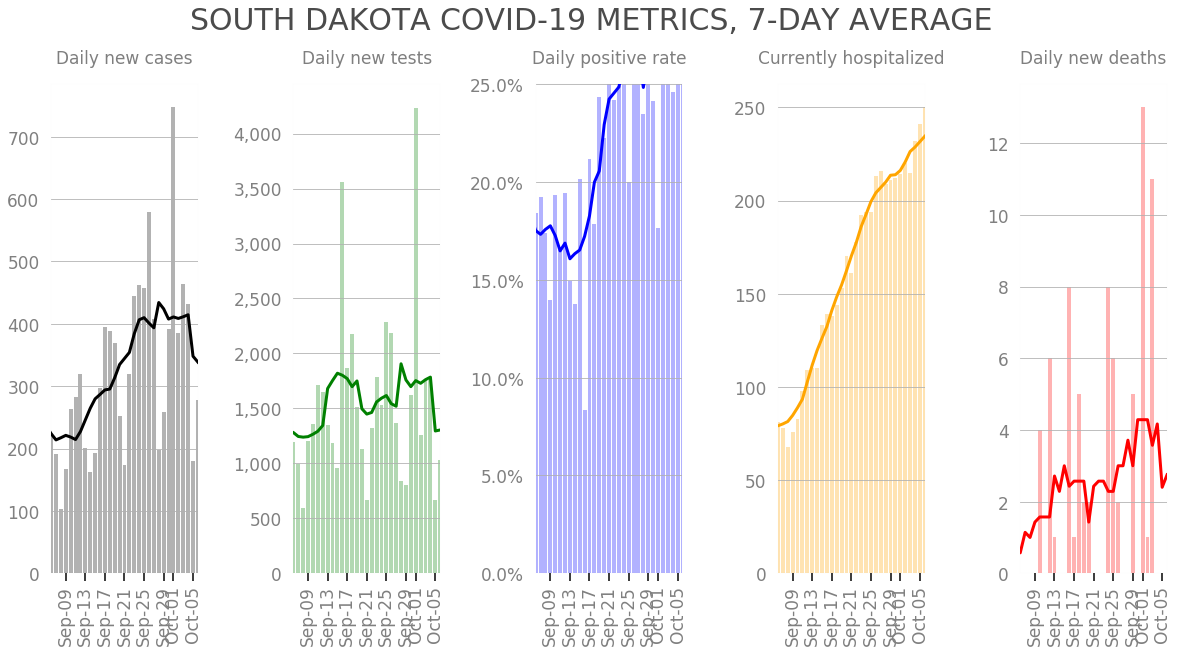

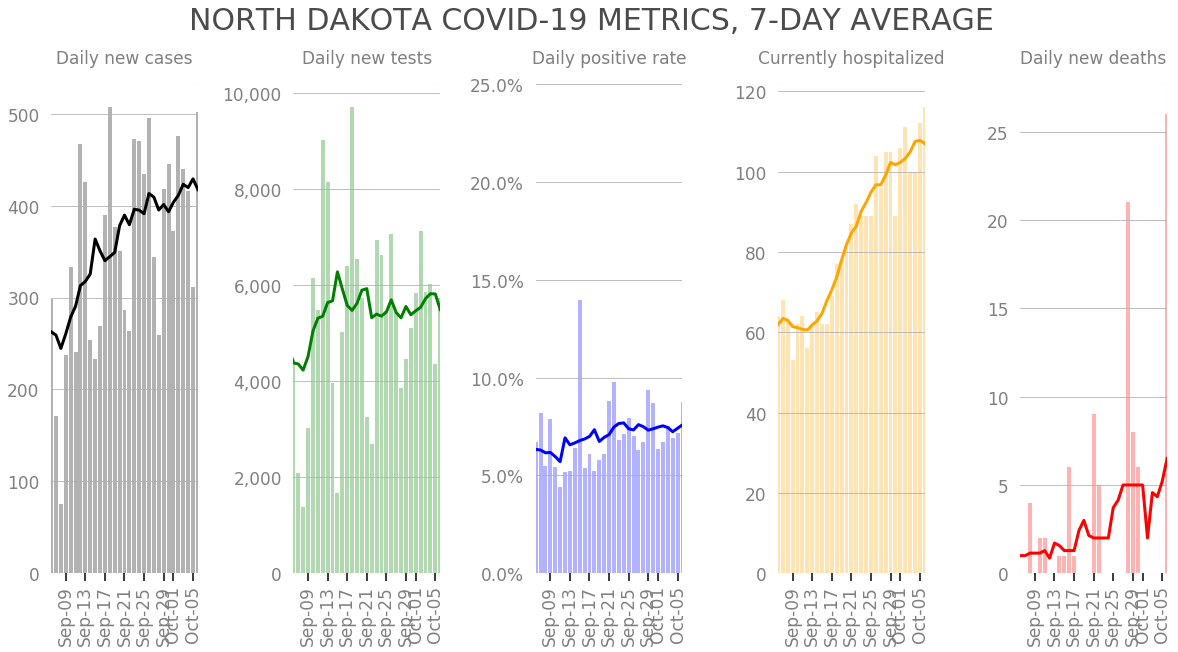

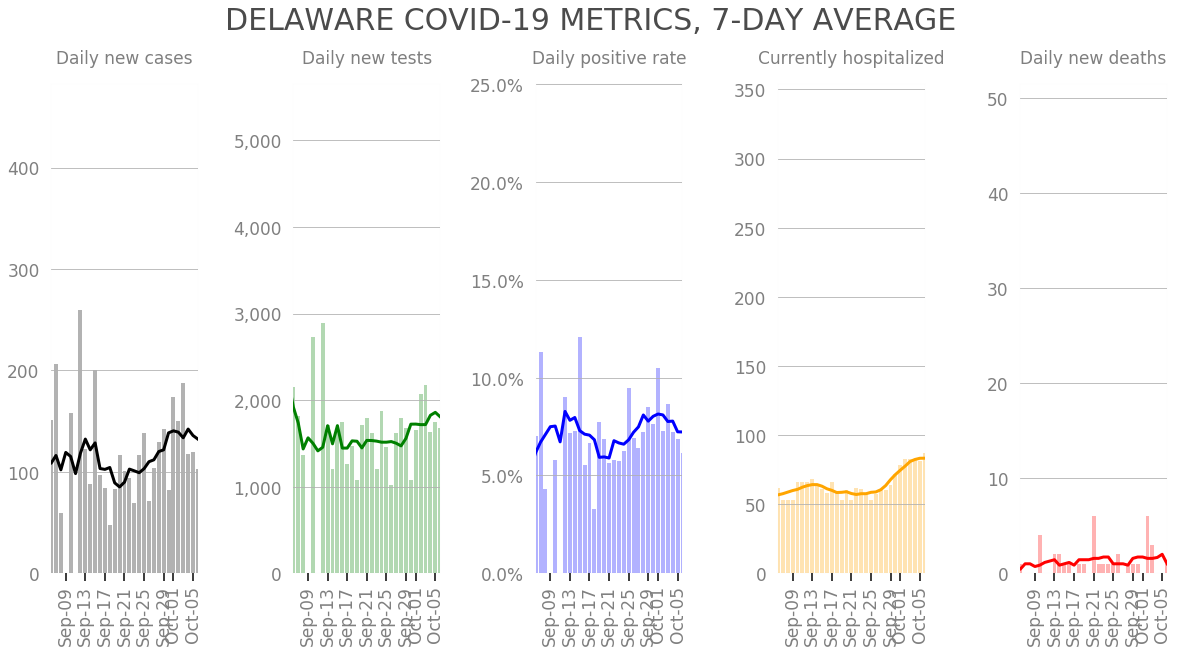

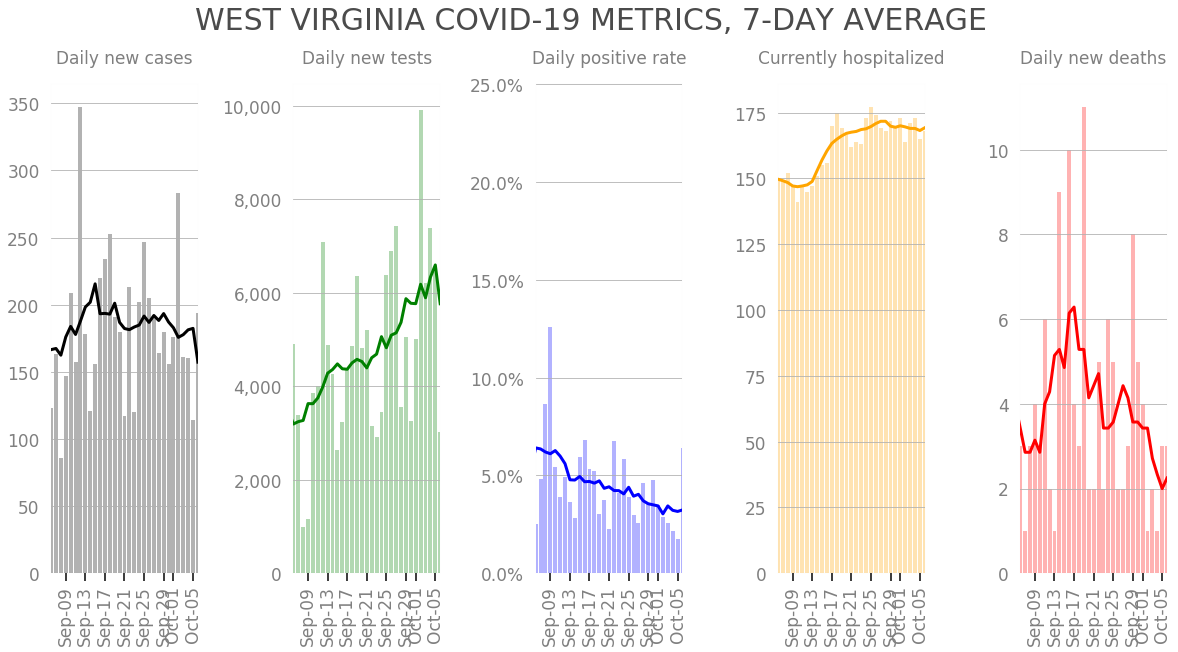

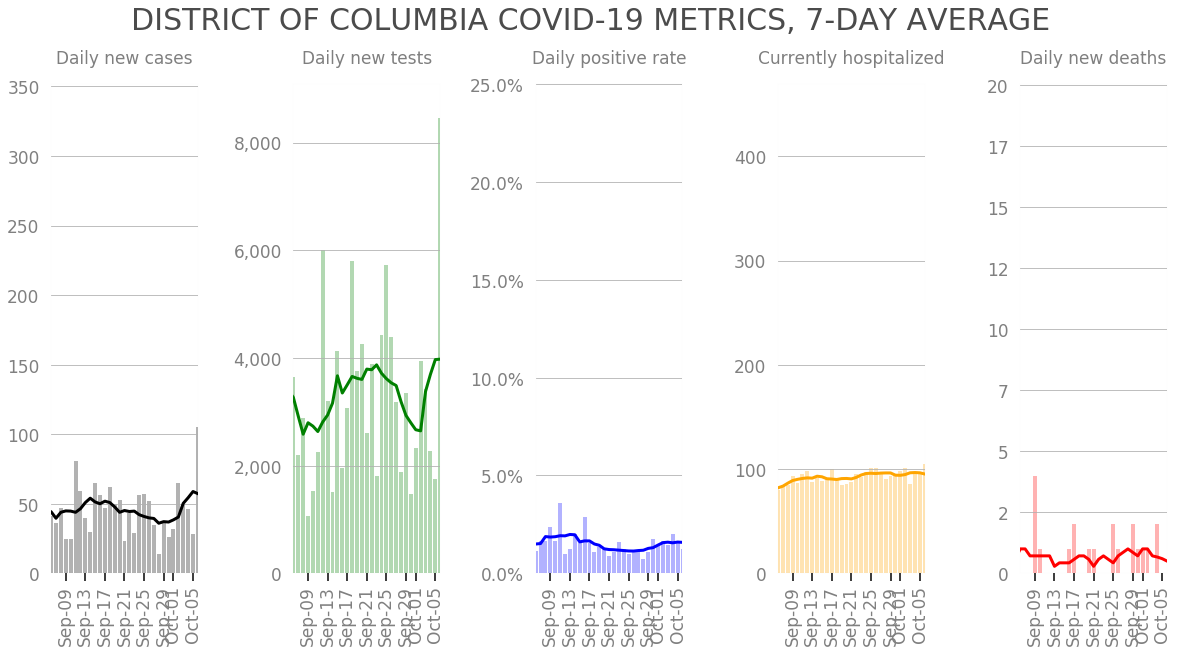

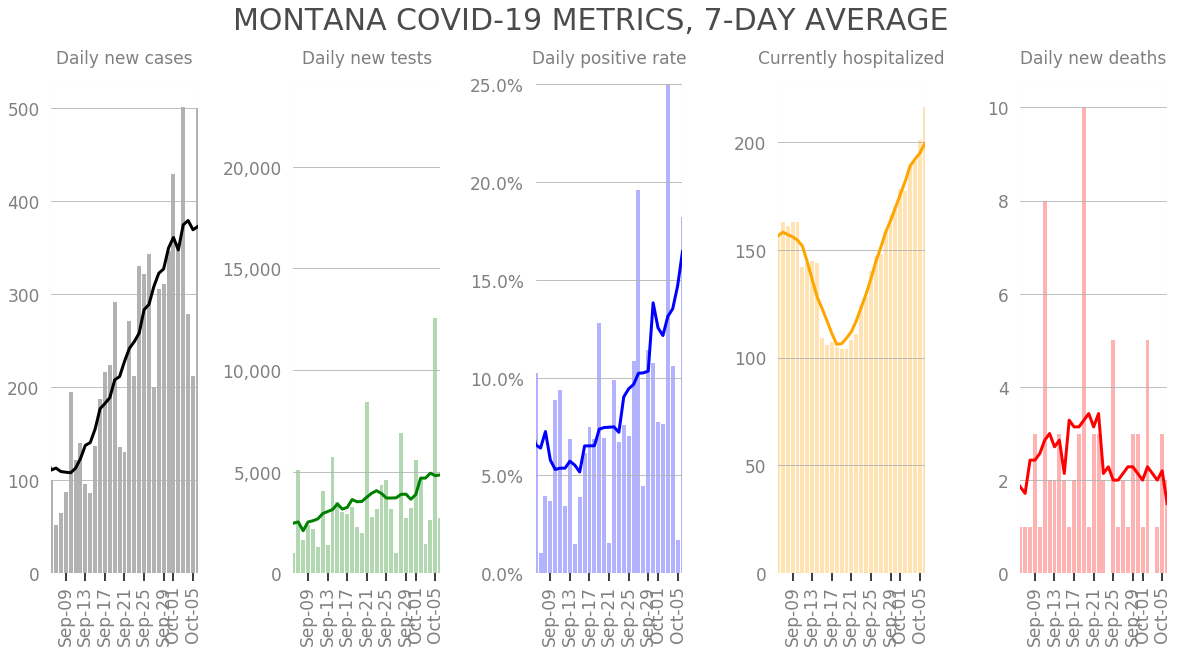

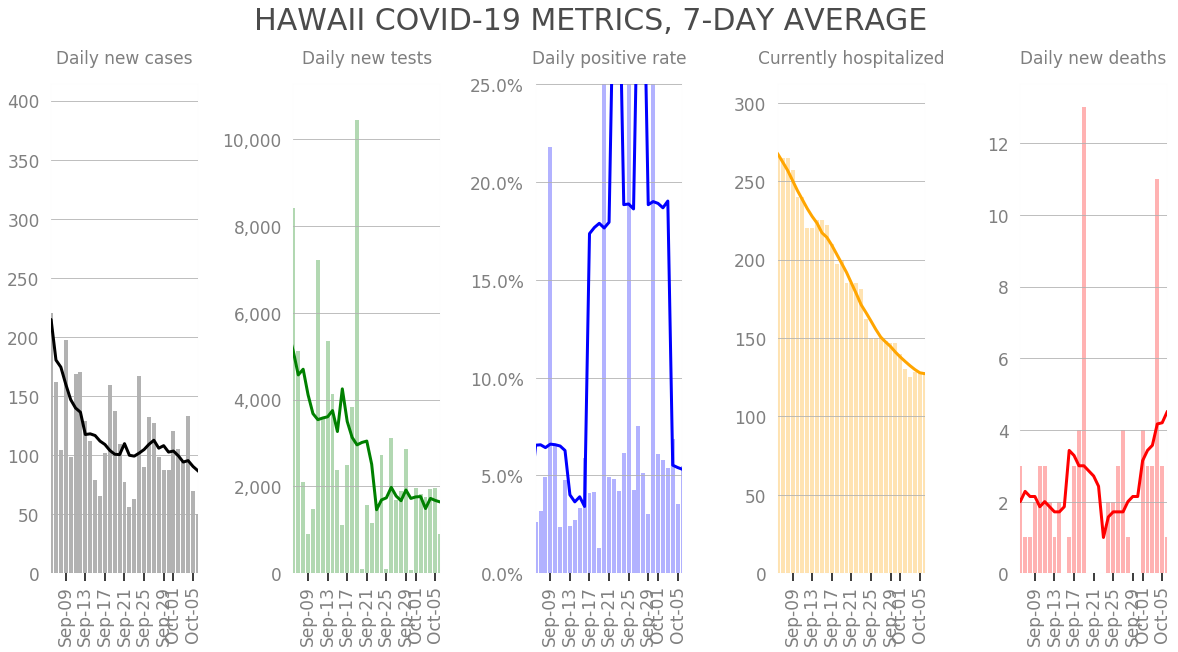

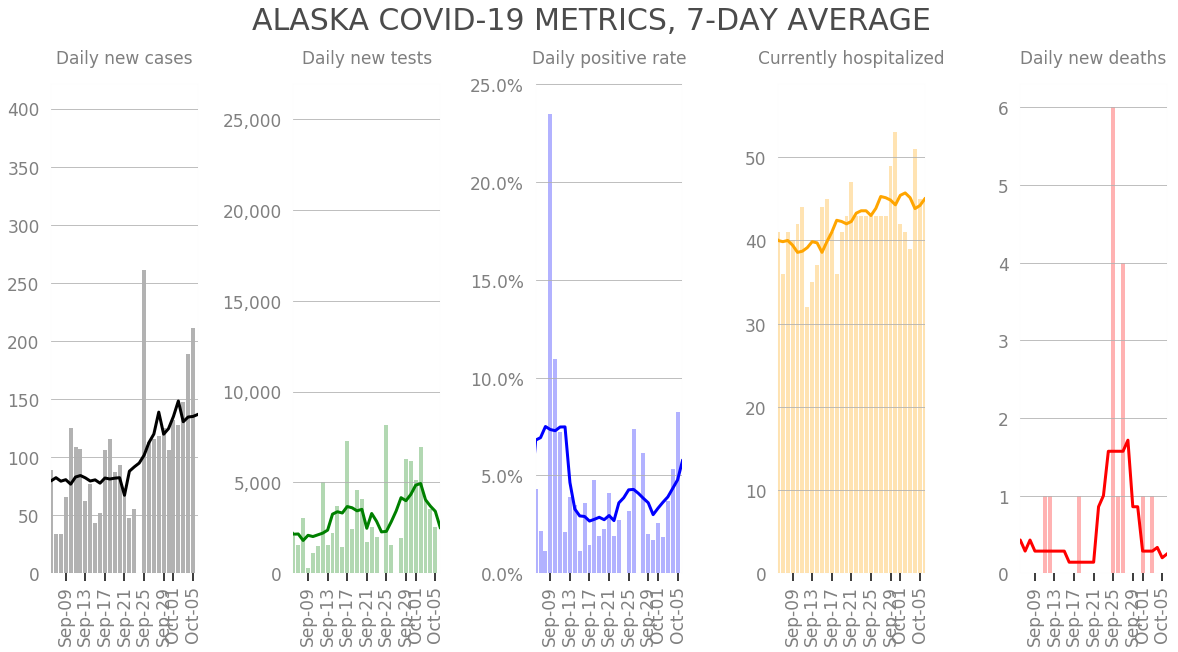

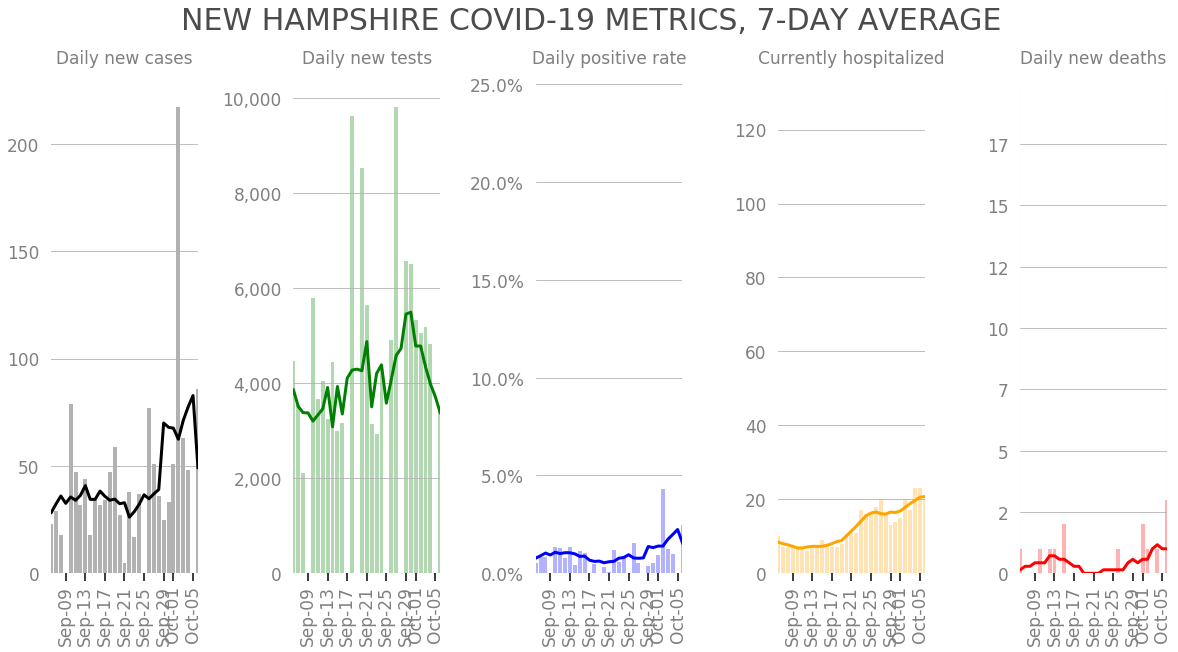

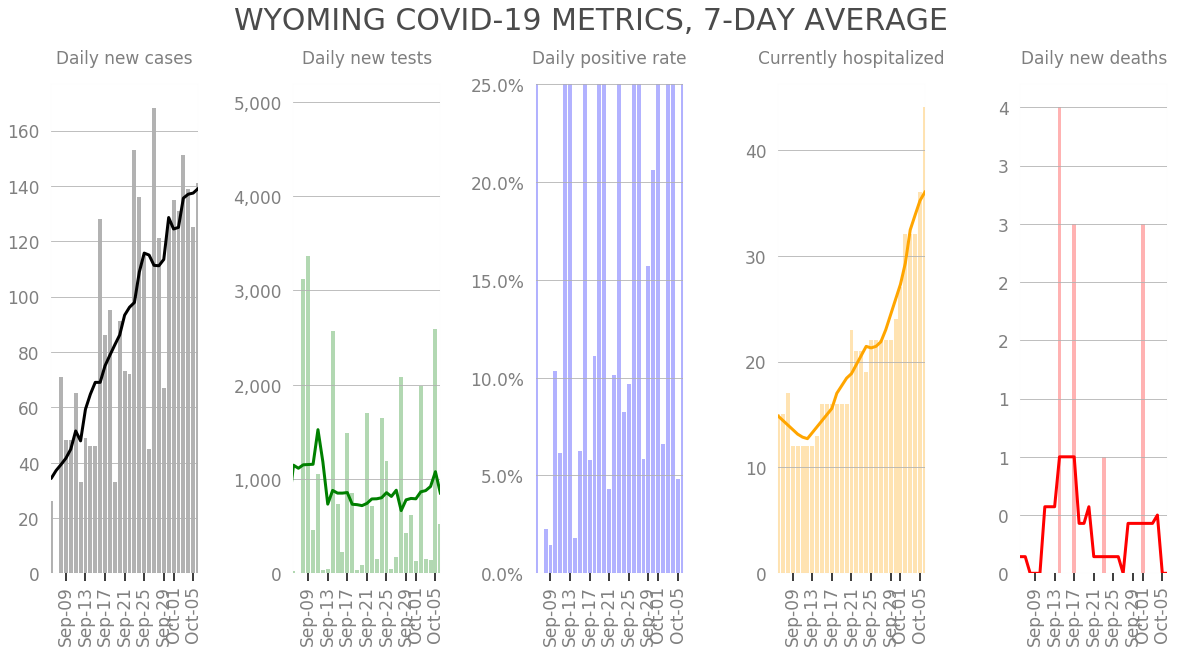

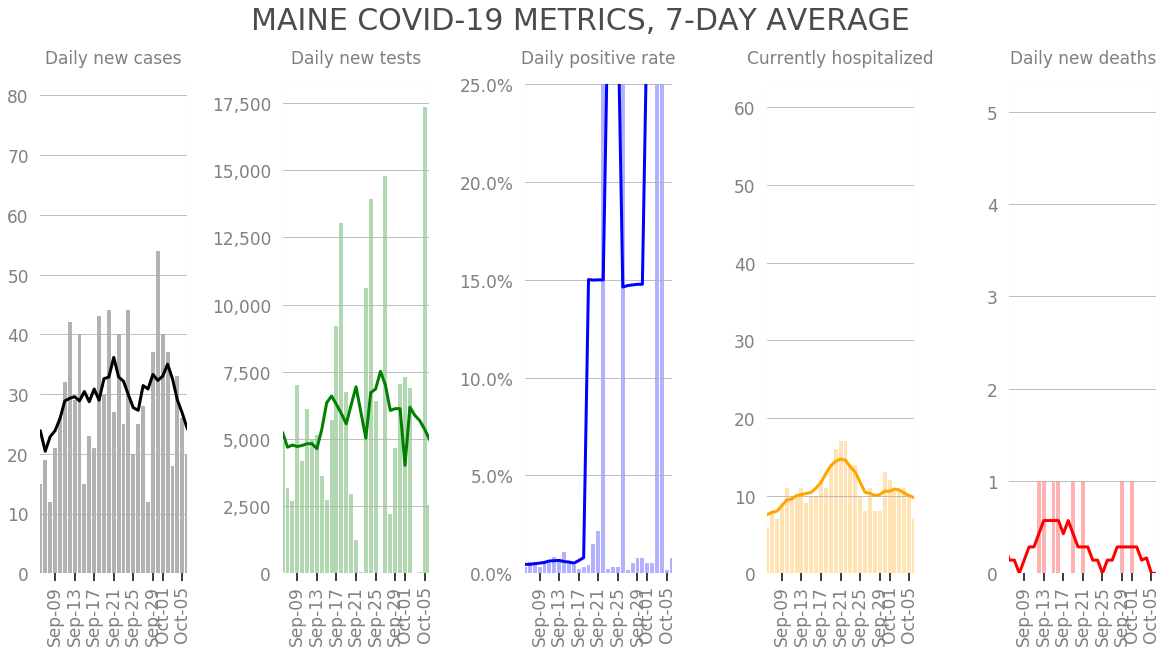

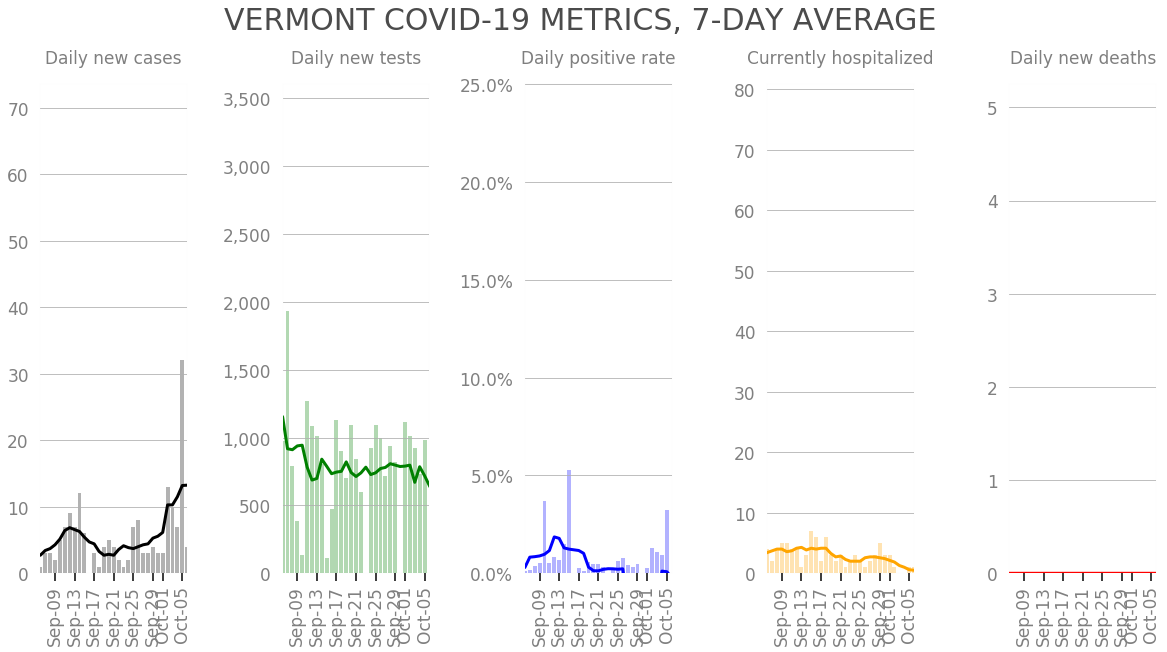

In [5]:
for focus_state in df[df['date']==df['date'][0]].sort_values('positive', ascending=False)['state']:
    
    #if you only want one state, use this. Otherwise, comment out. 
    """
    if focus_state == 'FL':
        pass
    else:
         continue
    """
    
    if focus_state not in ['AS', 'GU', 'MP', 'NA' 'PR', 'VI']:
        pass
    else:
        continue
    
    states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
             }
    state_full_name = str(states[focus_state])
    
    focus = df[df['state']==focus_state].drop('state', axis=1)
    focus.index = pd.date_range(end=df['date'][0],periods=len(focus), freq='D')[::-1]

    #offset = 45
    #focus =  focus.iloc[:-offset]
    
    fig, axis= plt.subplots(1, 5,figsize=(20,9) , squeeze=False)
    axis = axis.flatten()
    
    
    window = 7

    focus['average'] = focus['positiveIncrease'].rolling(window=window, min_periods=1, center=True).mean()

    focus['average_new_tests'] = focus['totalTestResultsIncrease'].rolling(window=window, min_periods=1, center=True).mean()

    focus['average_hospitalization'] = focus['hospitalizedCurrently'].rolling(window=window, min_periods=1, center=True).mean()

    focus['average_positivity'] = (focus['positiveIncrease']/focus['totalTestResultsIncrease']*100).rolling(window=window, min_periods=1, center=True).mean()

    focus['average_death_increase'] = focus['deathIncrease'].rolling(window=window, min_periods=1, center=True).mean()

    focus.fillna(0, inplace=True)

    # SETTING FONT #
    rc('font',weight='light')
    rc('axes', lw=0.01)
    
    # LINE PLOT #
    axis[0].plot(focus['average'], color = 'black', lw=3)
    axis[1].plot(focus['average_new_tests'],color='green', lw=3 )
    axis[2].plot(focus['average_positivity'],color ='blue', lw=3)
    axis[3].plot(focus['average_hospitalization'],color = 'orange',lw=3)
    axis[4].plot(focus['average_death_increase'],color = 'red',lw=3)

    # BAR PLOT #
    axis[0].bar(x=focus.index, height=focus['positiveIncrease'], color ='black', alpha=0.3)
    axis[1].bar(x=focus.index, height=focus['totalTestResultsIncrease'], color = 'green',alpha=0.3)
    axis[2].bar(x=focus.index, height=focus['positiveIncrease']/focus['totalTestResultsIncrease']*100, color ='blue',alpha=0.3)
    axis[3].bar(x=focus.index, height=focus['hospitalizedCurrently'], color ='orange',alpha=0.3)
    axis[4].bar(x=focus.index, height=focus['deathIncrease'], color ='red',alpha=0.3)

    # SETTING FIGURE MAIN TITLE #
    fig.suptitle('{} COVID-19 METRICS, 7-DAY AVERAGE'.format(state_full_name.upper()), fontsize=30, y =1, alpha=0.7)
    
    
    # SETTING SUBPLOTS TITLE #
    axis[0].set_title('Daily new cases',fontsize=17, y=1.03, alpha=0.5)
    axis[1].set_title('Daily new tests',fontsize=17, y=1.03, alpha=0.5)
    axis[2].set_title('Daily positive rate',fontsize=17, y=1.03, alpha=0.5)
    axis[3].set_title('Currently hospitalized',fontsize=17, y=1.03, alpha=0.5)
    axis[4].set_title('Daily new deaths',fontsize=17, y=1.03, alpha=0.5)

    # DATE FORMATTER #
    date_form = DateFormatter("%b-%d")

    # SETTING LABEL TO TOP & FORMATTING DATE #
    for ax in axis:
        ax.xaxis.set_label_position('top')
        ax.xaxis.set_major_formatter(date_form)    

    # SETTING TICK PARAMATERS #
    for ax in axis:
        ax.tick_params(axis='y',labelcolor= 'grey',labelsize = 17,width=0, length=8)
        ax.tick_params(axis='x',labelcolor= 'grey',labelsize = 17,labelrotation=90, width=1.5, length=8)

    # SETTING TICK LIMITS #
    axis[0].set_ylim(bottom=0)
    axis[1].set_ylim(bottom=0)
    axis[2].set_ylim(bottom=0, top=25)
    axis[3].set_ylim(bottom=0)
    axis[4].set_ylim(bottom=0)
    
    #set x-range to be the present - 1 month ago
    for ax in axis:
        ax.set_xlim(left=df['date'][0]-dateutil.relativedelta.relativedelta(months=1), right=df['date'][0])
        
    # FOR PUTTING COMMAS IN NUMBERS #
    for ax in axis:
        ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])              

    # SETTING Y AXIS IN % FOR PLOT 3#
    axis[2].yaxis.set_major_formatter(mtick.PercentFormatter())

    # SETTING GRID #
    for ax in axis:
        ax.grid(axis='y')

    # SETTING WIDTH BETWEEN THE PLOTS #
    plt.subplots_adjust(wspace=0.65)
    
    #plt.savefig(r'covid_tracking_plots\experimental/%s.png'% (state_full_name+date+'_2'), dpi=150, bbox_inches='tight', pad_inches=1)
    plt.show()